In [1]:
import numpy as np


def human_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'.rstrip('0').rstrip('.')
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

# Formatter function to map days → total_edges (in billions)
def billions_formatter(x, pos):
    e = np.interp(x, step_labels_days, total_edges)
    return f"{e / 1_000_000_000:.2f}B"

def compute_mean_std(data):
    data = np.array(data)
    return data.mean(axis=1), data.std(axis=1)

In [4]:
# Focused visualization of Temporal Walk Benchmark results
import pickle
import matplotlib.pyplot as plt

results_dir = 'results/'

# Load the benchmark results
def load_results():
    cpu_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_CPU.pkl", "rb")),
        "walks": pickle.load(open(f"{results_dir}/result_walks_CPU.pkl", "rb")),
        "max_walk_lens": pickle.load(open(f"{results_dir}/result_max_walk_lens_CPU.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_sliding_CPU.pkl", "rb"))
    }
    
    gpu_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_GPU.pkl", "rb")),
        "walks": pickle.load(open(f"{results_dir}/result_walks_GPU.pkl", "rb")),
        "max_walk_lens": pickle.load(open(f"{results_dir}/result_max_walk_lens_GPU.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_sliding_GPU.pkl", "rb"))
    }

    raphtory_results = {
        "edges": pickle.load(open(f"{results_dir}/result_edges_raphtory.pkl", "rb")),
        "incremental": pickle.load(open(f"{results_dir}/result_incremental_raphtory.pkl", "rb"))
    }
    
    return cpu_results, gpu_results, raphtory_results


def load_new_results():
    trw_raphtory_results = pickle.load(open(f"{results_dir}/results_trw_raphtory_edge_addition.pickle", "rb"))
    stellargraph_results = pickle.load(open(f"{results_dir}/results_stellargraph_edge_additions.pickle", "rb"))

    edge_addition_results = {
        'trw_gpu_with_weights': trw_raphtory_results['trw_edge_addition_gpu_with_weights'],
        'trw_gpu_without_weights': trw_raphtory_results['trw_edge_addition_gpu_without_weights'],
        'trw_cpu_with_weights': trw_raphtory_results['trw_edge_addition_cpu_with_weights'],
        'trw_cpu_without_weights': trw_raphtory_results['trw_edge_addition_cpu_without_weights'],
        'raphtory': trw_raphtory_results['raphtory_edge_addition'],
        'stellargraph': stellargraph_results['stellargraph_edge_addition']
    }

    walk_sampling_results = {
        'gpu_weight_based': trw_raphtory_results['walk_sampling_gpu_weight_based'],
        'gpu_index_based': trw_raphtory_results['walk_sampling_gpu_index_based'],
        'cpu_weight_based': trw_raphtory_results['walk_sampling_cpu_weight_based'],
        'cpu_index_based': trw_raphtory_results['walk_sampling_cpu_index_based']
    }

    return edge_addition_results, walk_sampling_results


edge_counts = [
    1_000,      # 1K
    5_000,      # 5K
    10_000,     # 10K
    50_000,     # 50K
    100_000,    # 100K
    500_000,    # 500K
    1_000_000,  # 1M
    5_000_000,  # 5M
    10_000_000, # 10M
    50_000_000, # 50M
    100_000_000,# 100M
    200_000_000,# 200M
    301_183_000 # Full dataset
]


walk_counts = [
    10_000, 50_000, 100_000, 200_000, 500_000,
    1_000_000, 2_000_000, 5_000_000, 10_000_000
]

walk_lengths = list(range(10, 310, 10))

# Load results
cpu_results, gpu_results, raphtory_results = load_results()
edge_addition_results, walk_sampling_results = load_new_results()

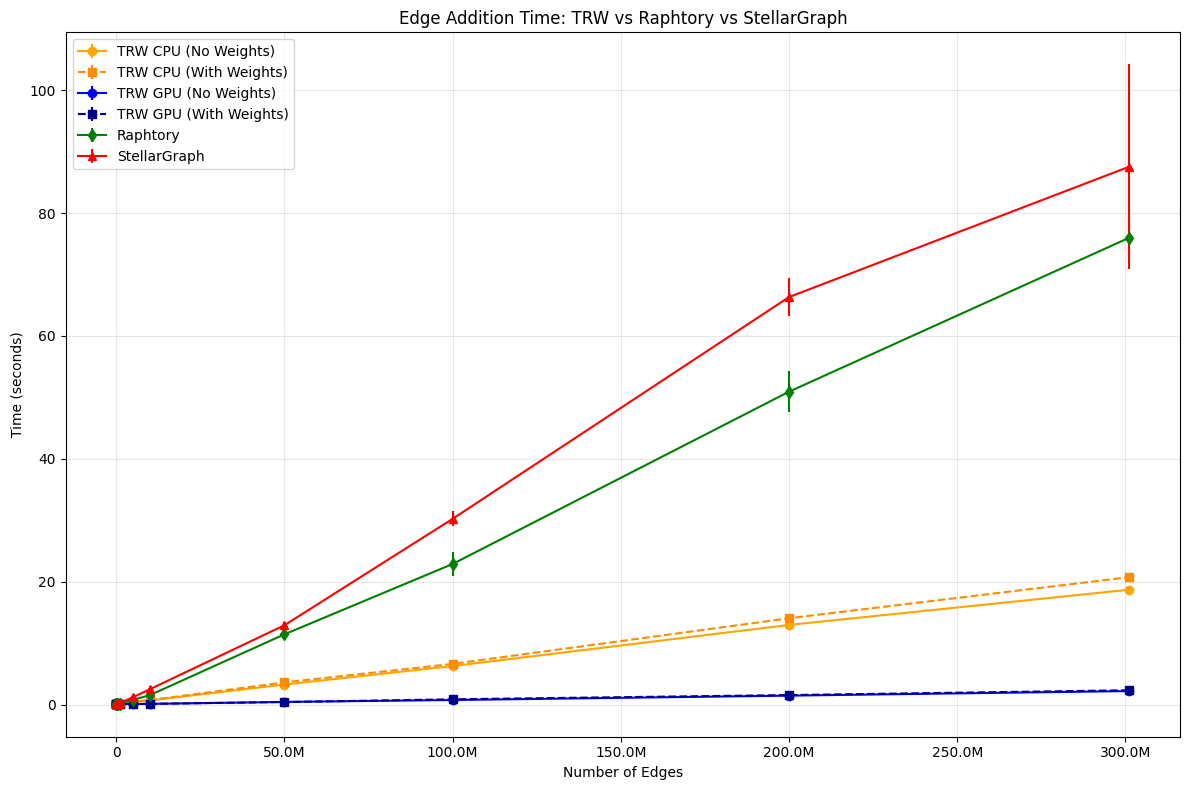

In [5]:
from matplotlib import ticker

# Extract means and standard deviations from new results
cpu_mean_wo, cpu_std_wo = compute_mean_std(edge_addition_results['trw_cpu_without_weights'])
cpu_mean_w, cpu_std_w = compute_mean_std(edge_addition_results['trw_cpu_with_weights'])

gpu_mean_wo, gpu_std_wo = compute_mean_std(edge_addition_results['trw_gpu_without_weights'])
gpu_mean_w, gpu_std_w = compute_mean_std(edge_addition_results['trw_gpu_with_weights'])

raphtory_mean, raphtory_std = compute_mean_std(edge_addition_results['raphtory'])
stellargraph_mean, stellargraph_std = compute_mean_std(edge_addition_results['stellargraph'])

# Plot
plt.figure(figsize=(12, 8))

plt.errorbar(edge_counts, cpu_mean_wo, yerr=cpu_std_wo,
             fmt='o-', color='orange', label="TRW CPU (No Weights)")

plt.errorbar(edge_counts, cpu_mean_w, yerr=cpu_std_w,
             fmt='s--', color='darkorange', label="TRW CPU (With Weights)")

plt.errorbar(edge_counts, gpu_mean_wo, yerr=gpu_std_wo,
             fmt='o-', color='blue', label="TRW GPU (No Weights)")

plt.errorbar(edge_counts, gpu_mean_w, yerr=gpu_std_w,
             fmt='s--', color='darkblue', label="TRW GPU (With Weights)")

plt.errorbar(edge_counts, raphtory_mean, yerr=raphtory_std,
             fmt='d-', color='green', label="Raphtory")

plt.errorbar(edge_counts, stellargraph_mean, yerr=stellargraph_std,
             fmt='^-', color='red', label="StellarGraph")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xlabel("Number of Edges")
plt.ylabel("Time (seconds)")
plt.title("Edge Addition Time: TRW vs Raphtory vs StellarGraph")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("plots/plot1_edge_addition_comparison_new.png")
plt.show()

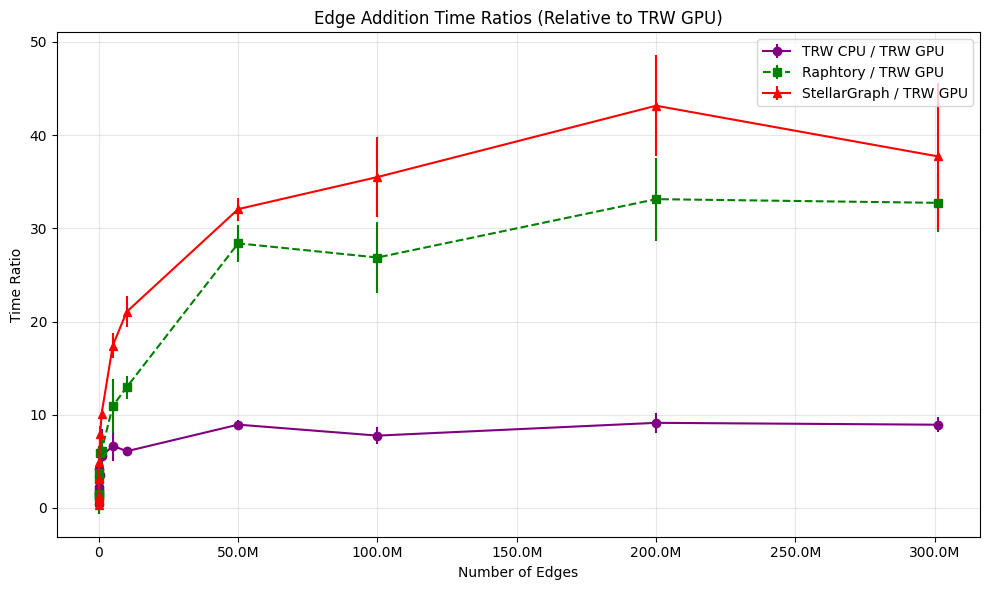

In [6]:
# Means and stds from new results
cpu_mean, cpu_std = compute_mean_std(edge_addition_results['trw_cpu_with_weights'])
gpu_mean, gpu_std = compute_mean_std(edge_addition_results['trw_gpu_with_weights'])
raphtory_mean, raphtory_std = compute_mean_std(edge_addition_results['raphtory'])
stellargraph_mean, stellargraph_std = compute_mean_std(edge_addition_results['stellargraph'])

# Compute ratios and propagated error bars
ratios_cpu_gpu = cpu_mean / gpu_mean
ratios_cpu_gpu_std = ratios_cpu_gpu * np.sqrt((cpu_std / cpu_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

ratios_raphtory_gpu = raphtory_mean / gpu_mean
ratios_raphtory_gpu_std = ratios_raphtory_gpu * np.sqrt((raphtory_std / raphtory_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

ratios_stellargraph_gpu = stellargraph_mean / gpu_mean
ratios_stellargraph_gpu_std = ratios_stellargraph_gpu * np.sqrt((stellargraph_std / stellargraph_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

# Plot
plt.figure(figsize=(10, 6))

plt.errorbar(edge_counts, ratios_cpu_gpu, yerr=ratios_cpu_gpu_std,
             fmt='o-', color='purple', label='TRW CPU / TRW GPU')

plt.errorbar(edge_counts, ratios_raphtory_gpu, yerr=ratios_raphtory_gpu_std,
             fmt='s--', color='green', label='Raphtory / TRW GPU')

plt.errorbar(edge_counts, ratios_stellargraph_gpu, yerr=ratios_stellargraph_gpu_std,
             fmt='^-', color='red', label='StellarGraph / TRW GPU')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xlabel("Number of Edges")
plt.ylabel("Time Ratio")
plt.title("Edge Addition Time Ratios (Relative to TRW GPU)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("plots/ratio_plot1_edge_addition_new.png")
plt.show()

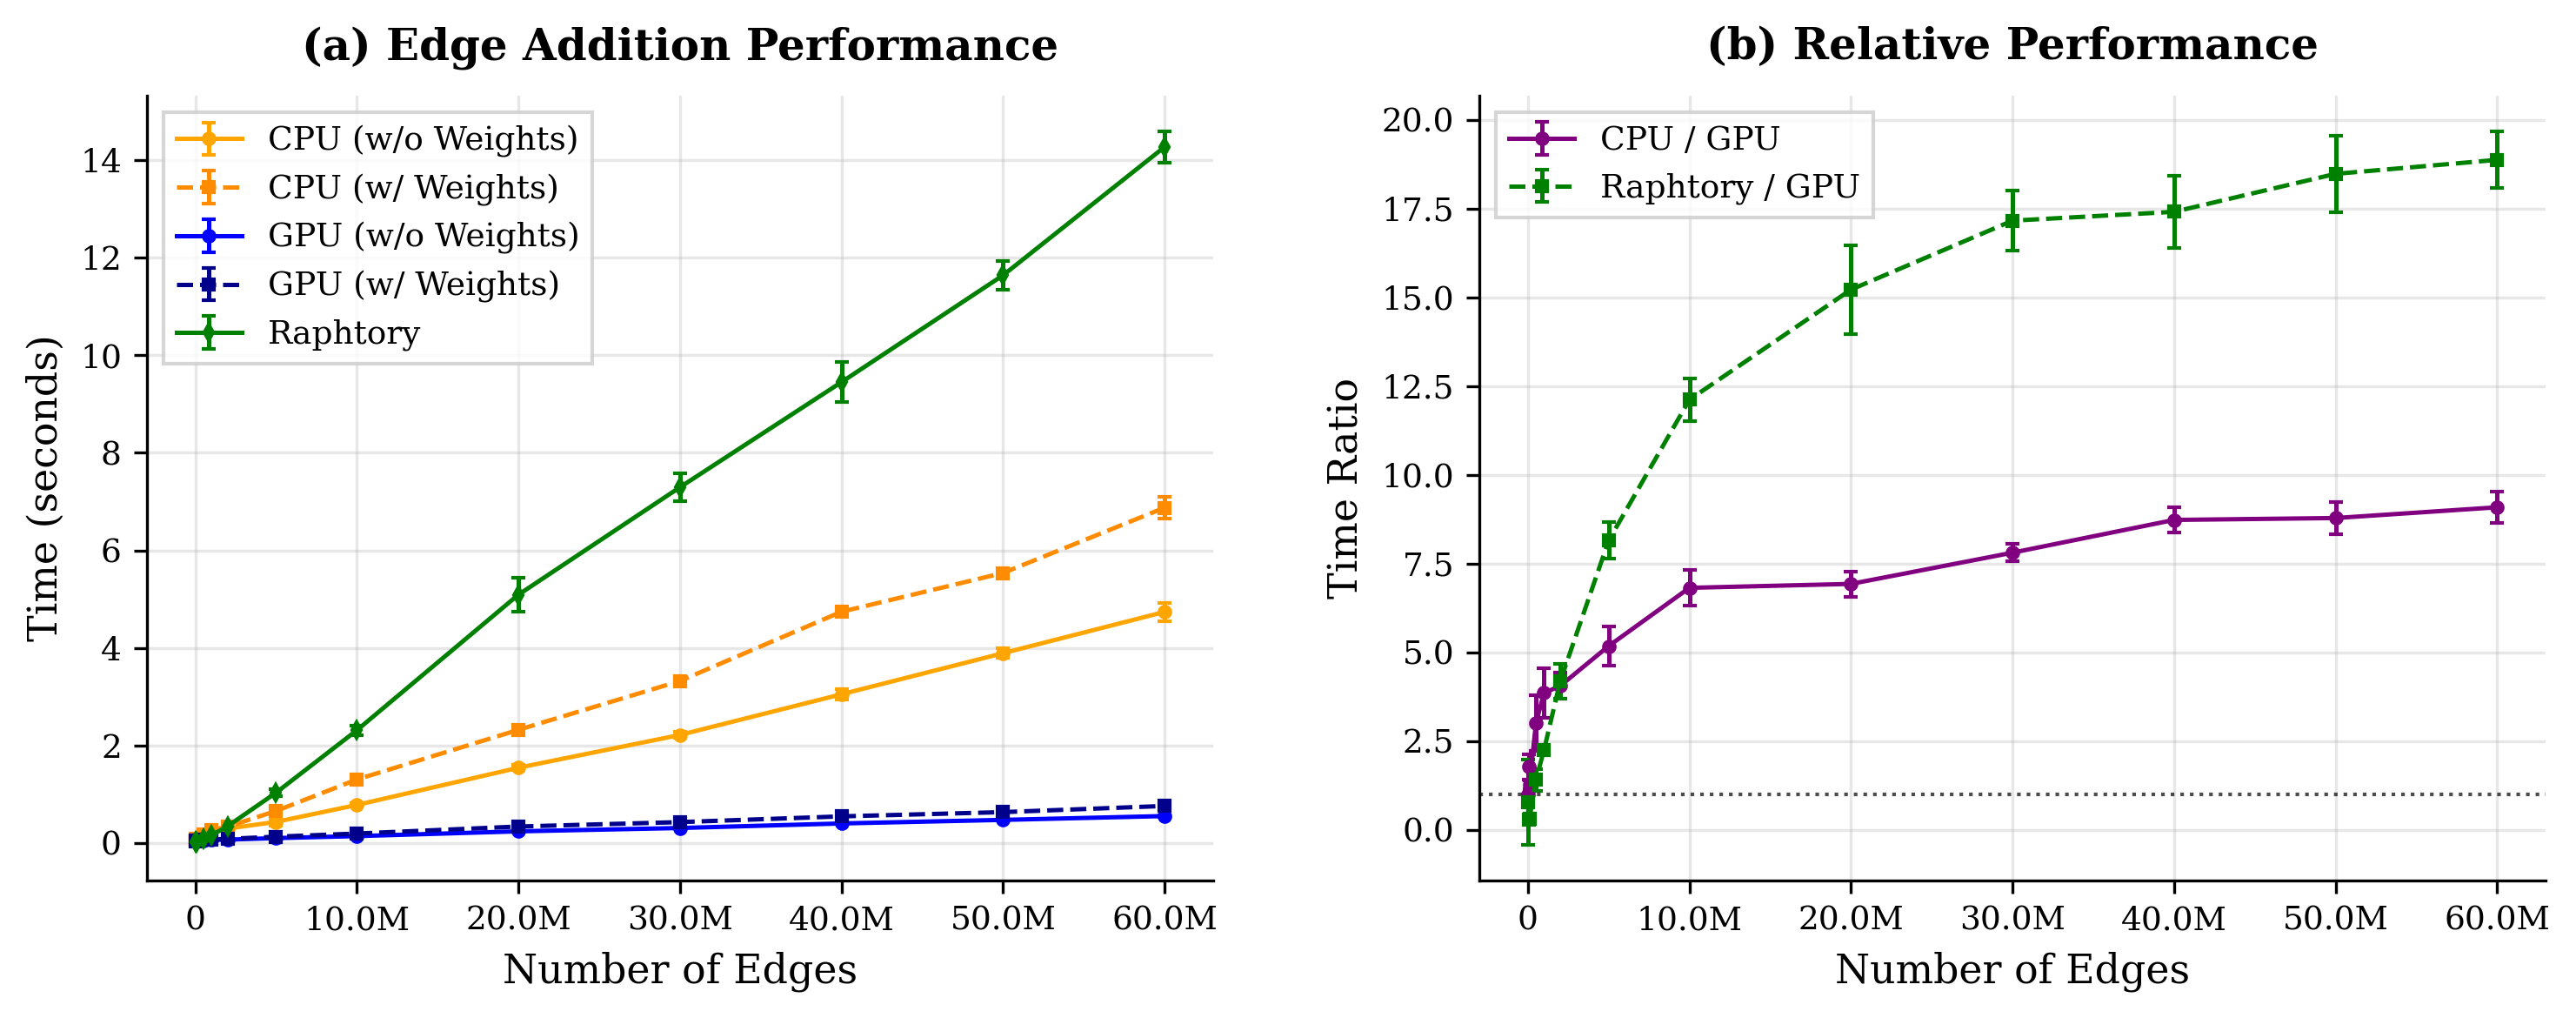

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Academic color scheme - matching original plots
colors = {
    'cpu_no_weights': 'orange',       # Orange
    'cpu_weights': 'darkorange',      # Dark orange
    'gpu_no_weights': 'blue',         # Blue
    'gpu_weights': 'darkblue',        # Dark blue
    'raphtory': 'green',              # Green
    'ratio_cpu_gpu': 'purple',        # Purple
    'ratio_raphtory_gpu': 'green'     # Green
}

# Compute means and standard deviations
cpu_mean_wo, cpu_std_wo = compute_mean_std(cpu_results["edges"]["edge_addition_time_without_weights"])
cpu_mean_w, cpu_std_w = compute_mean_std(cpu_results["edges"]["edge_addition_time_with_weights"])
gpu_mean_wo, gpu_std_wo = compute_mean_std(gpu_results["edges"]["edge_addition_time_without_weights"])
gpu_mean_w, gpu_std_w = compute_mean_std(gpu_results["edges"]["edge_addition_time_with_weights"])
raphtory_mean, raphtory_std = compute_mean_std(raphtory_results["edges"])

# Compute ratios and propagated error bars
ratios_cpu_gpu = cpu_mean_w / gpu_mean_w
ratios_cpu_gpu_std = ratios_cpu_gpu * np.sqrt((cpu_std_w / cpu_mean_w) ** 2 + (gpu_std_w / gpu_mean_w) ** 2)

ratios_raphtory_gpu = raphtory_mean / gpu_mean_w
ratios_raphtory_gpu_std = ratios_raphtory_gpu * np.sqrt((raphtory_std / raphtory_mean) ** 2 + (gpu_std_w / gpu_mean_w) ** 2)

# Create 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# --- Left plot: Absolute Performance ---
ax1.errorbar(edge_counts, cpu_mean_wo, yerr=cpu_std_wo,
             fmt='o-', color=colors['cpu_no_weights'], label="CPU (w/o Weights)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(edge_counts, cpu_mean_w, yerr=cpu_std_w,
             fmt='s--', color=colors['cpu_weights'], label="CPU (w/ Weights)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(edge_counts, gpu_mean_wo, yerr=gpu_std_wo,
             fmt='o-', color=colors['gpu_no_weights'], label="GPU (w/o Weights)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(edge_counts, gpu_mean_w, yerr=gpu_std_w,
             fmt='s--', color=colors['gpu_weights'], label="GPU (w/ Weights)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(edge_counts, raphtory_mean, yerr=raphtory_std,
             fmt='d-', color=colors['raphtory'], label="Raphtory",
             markersize=3, linewidth=1.2, capsize=2)

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
ax1.set_xlabel("Number of Edges")
ax1.set_ylabel("Time (seconds)")
ax1.set_title("(a) Edge Addition Performance", fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --- Right plot: Performance Ratios ---
ax2.errorbar(edge_counts, ratios_cpu_gpu, yerr=ratios_cpu_gpu_std,
             fmt='o-', color=colors['ratio_cpu_gpu'], label='CPU / GPU',
             markersize=3, linewidth=1.2, capsize=2)

ax2.errorbar(edge_counts, ratios_raphtory_gpu, yerr=ratios_raphtory_gpu_std,
             fmt='s--', color=colors['ratio_raphtory_gpu'], label='Raphtory / GPU',
             markersize=3, linewidth=1.2, capsize=2)

# Add horizontal line at y=1 for reference
ax2.axhline(y=1, color='black', linestyle=':', alpha=0.7, linewidth=1)

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
ax2.set_xlabel("Number of Edges")
ax2.set_ylabel("Time Ratio")
ax2.set_title("(b) Relative Performance", fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)

# Save with high quality
plt.savefig("plots/edge_addition_combined_performance.pdf", format='pdf', bbox_inches='tight')
plt.savefig("plots/edge_addition_combined_performance.png", format='png', bbox_inches='tight')
plt.show()

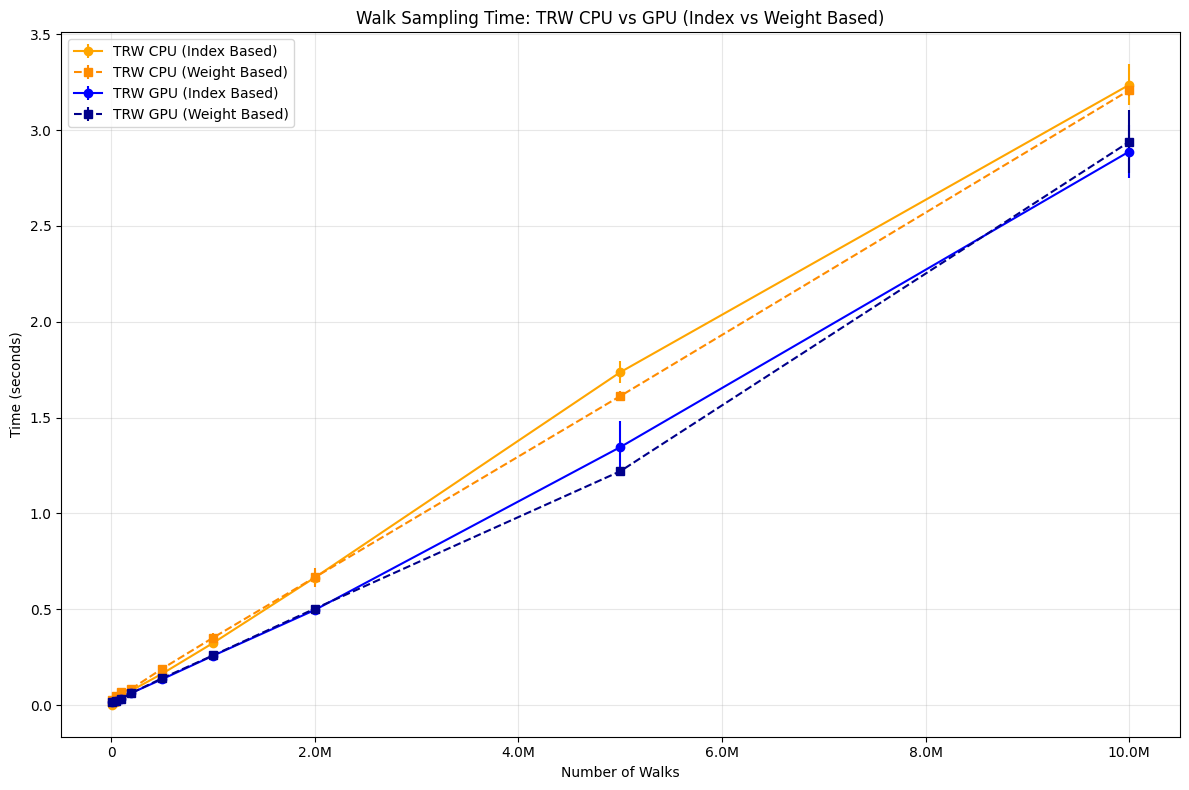

In [7]:
# Compute mean and std for all series from new results
cpu_mean_index, cpu_std_index = compute_mean_std(walk_sampling_results['cpu_index_based'])
cpu_mean_weight, cpu_std_weight = compute_mean_std(walk_sampling_results['cpu_weight_based'])
gpu_mean_index, gpu_std_index = compute_mean_std(walk_sampling_results['gpu_index_based'])
gpu_mean_weight, gpu_std_weight = compute_mean_std(walk_sampling_results['gpu_weight_based'])

# Plot
plt.figure(figsize=(12, 8))

plt.errorbar(walk_counts, cpu_mean_index, yerr=cpu_std_index,
             fmt='o-', color='orange', label="TRW CPU (Index Based)")

plt.errorbar(walk_counts, cpu_mean_weight, yerr=cpu_std_weight,
             fmt='s--', color='darkorange', label="TRW CPU (Weight Based)")

plt.errorbar(walk_counts, gpu_mean_index, yerr=gpu_std_index,
             fmt='o-', color='blue', label="TRW GPU (Index Based)")

plt.errorbar(walk_counts, gpu_mean_weight, yerr=gpu_std_weight,
             fmt='s--', color='darkblue', label="TRW GPU (Weight Based)")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xlabel("Number of Walks")
plt.ylabel("Time (seconds)")
plt.title("Walk Sampling Time: TRW CPU vs GPU (Index vs Weight Based)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("plots/plot2_walk_sampling_comparison_new.png")
plt.show()

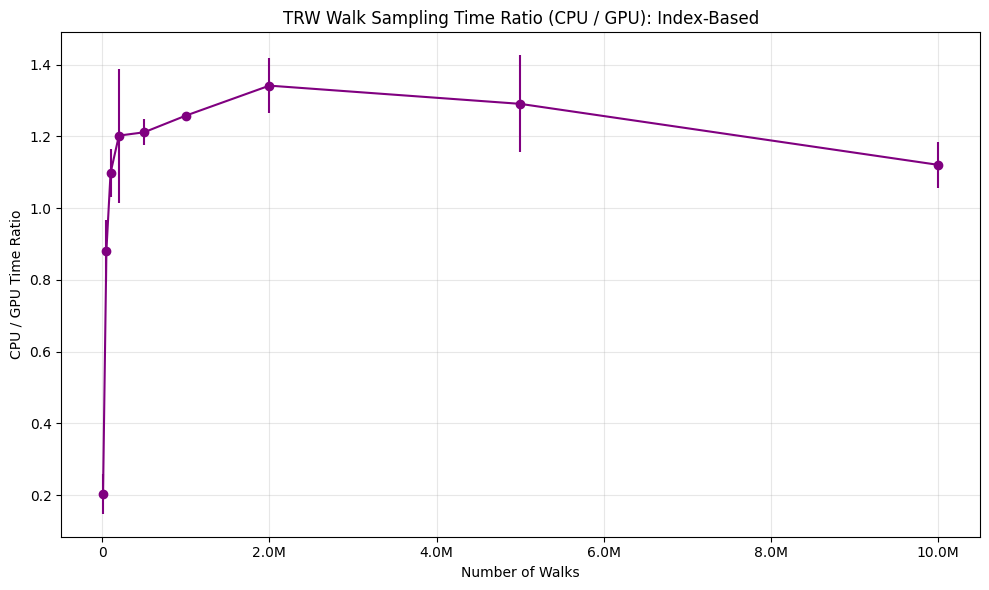

In [8]:
# 1. Extract and compute mean/std from new results
cpu_mean, cpu_std = compute_mean_std(walk_sampling_results['cpu_index_based'])
gpu_mean, gpu_std = compute_mean_std(walk_sampling_results['gpu_index_based'])

# 2. Compute ratio and error propagation
ratios = cpu_mean / gpu_mean
ratios_std = ratios * np.sqrt((cpu_std / cpu_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

# 3. Plot
plt.figure(figsize=(10, 6))
plt.errorbar(walk_counts, ratios, yerr=ratios_std, fmt='o-', color='purple')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xlabel("Number of Walks")
plt.ylabel("CPU / GPU Time Ratio")
plt.title("TRW Walk Sampling Time Ratio (CPU / GPU): Index-Based")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/ratio_plot2_walk_sampling_new.png")
plt.show()

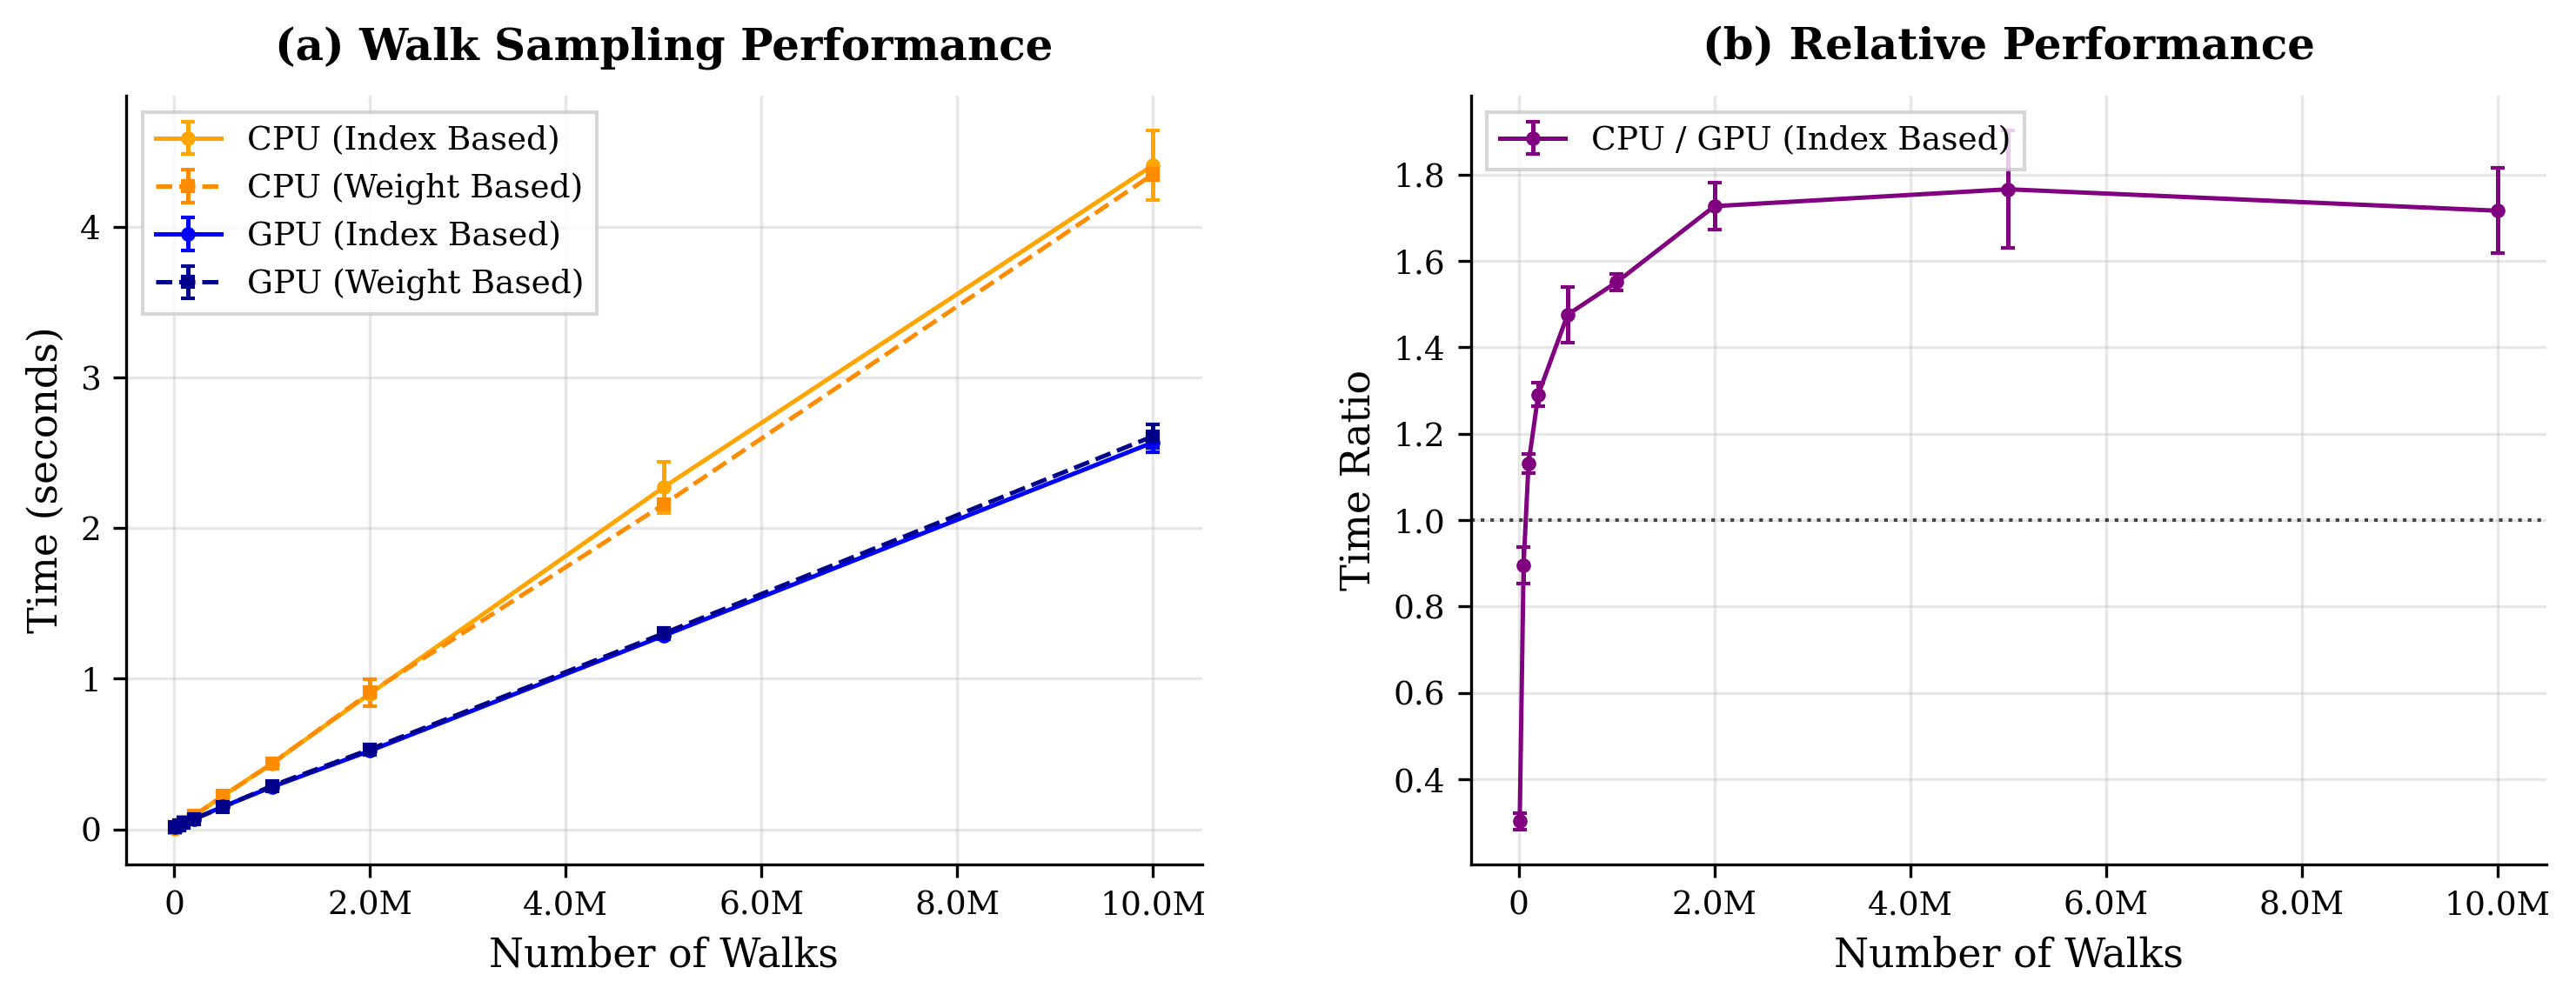

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Academic color scheme - matching your original colors
colors = {
    'cpu_index': 'orange',
    'cpu_weight': 'darkorange',
    'gpu_index': 'blue',
    'gpu_weight': 'darkblue',
    'ratio': 'purple'
}

# Compute mean and std for all series
cpu_mean_index, cpu_std_index = compute_mean_std(cpu_results["walks"]["walk_sampling_time_index_based"])
cpu_mean_weight, cpu_std_weight = compute_mean_std(cpu_results["walks"]["walk_sampling_time_weight_based"])
gpu_mean_index, gpu_std_index = compute_mean_std(gpu_results["walks"]["walk_sampling_time_index_based"])
gpu_mean_weight, gpu_std_weight = compute_mean_std(gpu_results["walks"]["walk_sampling_time_weight_based"])

# Compute ratio and error propagation (using index-based for comparison)
ratios = cpu_mean_index / gpu_mean_index
ratios_std = ratios * np.sqrt((cpu_std_index / cpu_mean_index) ** 2 + (gpu_std_index / gpu_mean_index) ** 2)

# Create 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# --- Left plot: Absolute Performance ---
ax1.errorbar(walk_counts, cpu_mean_index, yerr=cpu_std_index,
             fmt='o-', color=colors['cpu_index'], label="CPU (Index Based)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(walk_counts, cpu_mean_weight, yerr=cpu_std_weight,
             fmt='s--', color=colors['cpu_weight'], label="CPU (Weight Based)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(walk_counts, gpu_mean_index, yerr=gpu_std_index,
             fmt='o-', color=colors['gpu_index'], label="GPU (Index Based)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(walk_counts, gpu_mean_weight, yerr=gpu_std_weight,
             fmt='s--', color=colors['gpu_weight'], label="GPU (Weight Based)",
             markersize=3, linewidth=1.2, capsize=2)

ax1.xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
ax1.set_xlabel("Number of Walks")
ax1.set_ylabel("Time (seconds)")
ax1.set_title("(a) Walk Sampling Performance", fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --- Right plot: Performance Ratios ---
ax2.errorbar(walk_counts, ratios, yerr=ratios_std,
             fmt='o-', color=colors['ratio'], label='CPU / GPU (Index Based)',
             markersize=3, linewidth=1.2, capsize=2)

# Add horizontal line at y=1 for reference
ax2.axhline(y=1, color='black', linestyle=':', alpha=0.7, linewidth=1)

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
ax2.set_xlabel("Number of Walks")
ax2.set_ylabel("Time Ratio")
ax2.set_title("(b) Relative Performance", fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88)  # Add space for suptitle

# Save with high quality
plt.savefig("plots/walk_sampling_combined_performance.pdf", format='pdf', bbox_inches='tight')
plt.savefig("plots/walk_sampling_combined_performance.png", format='png', bbox_inches='tight')
plt.show()

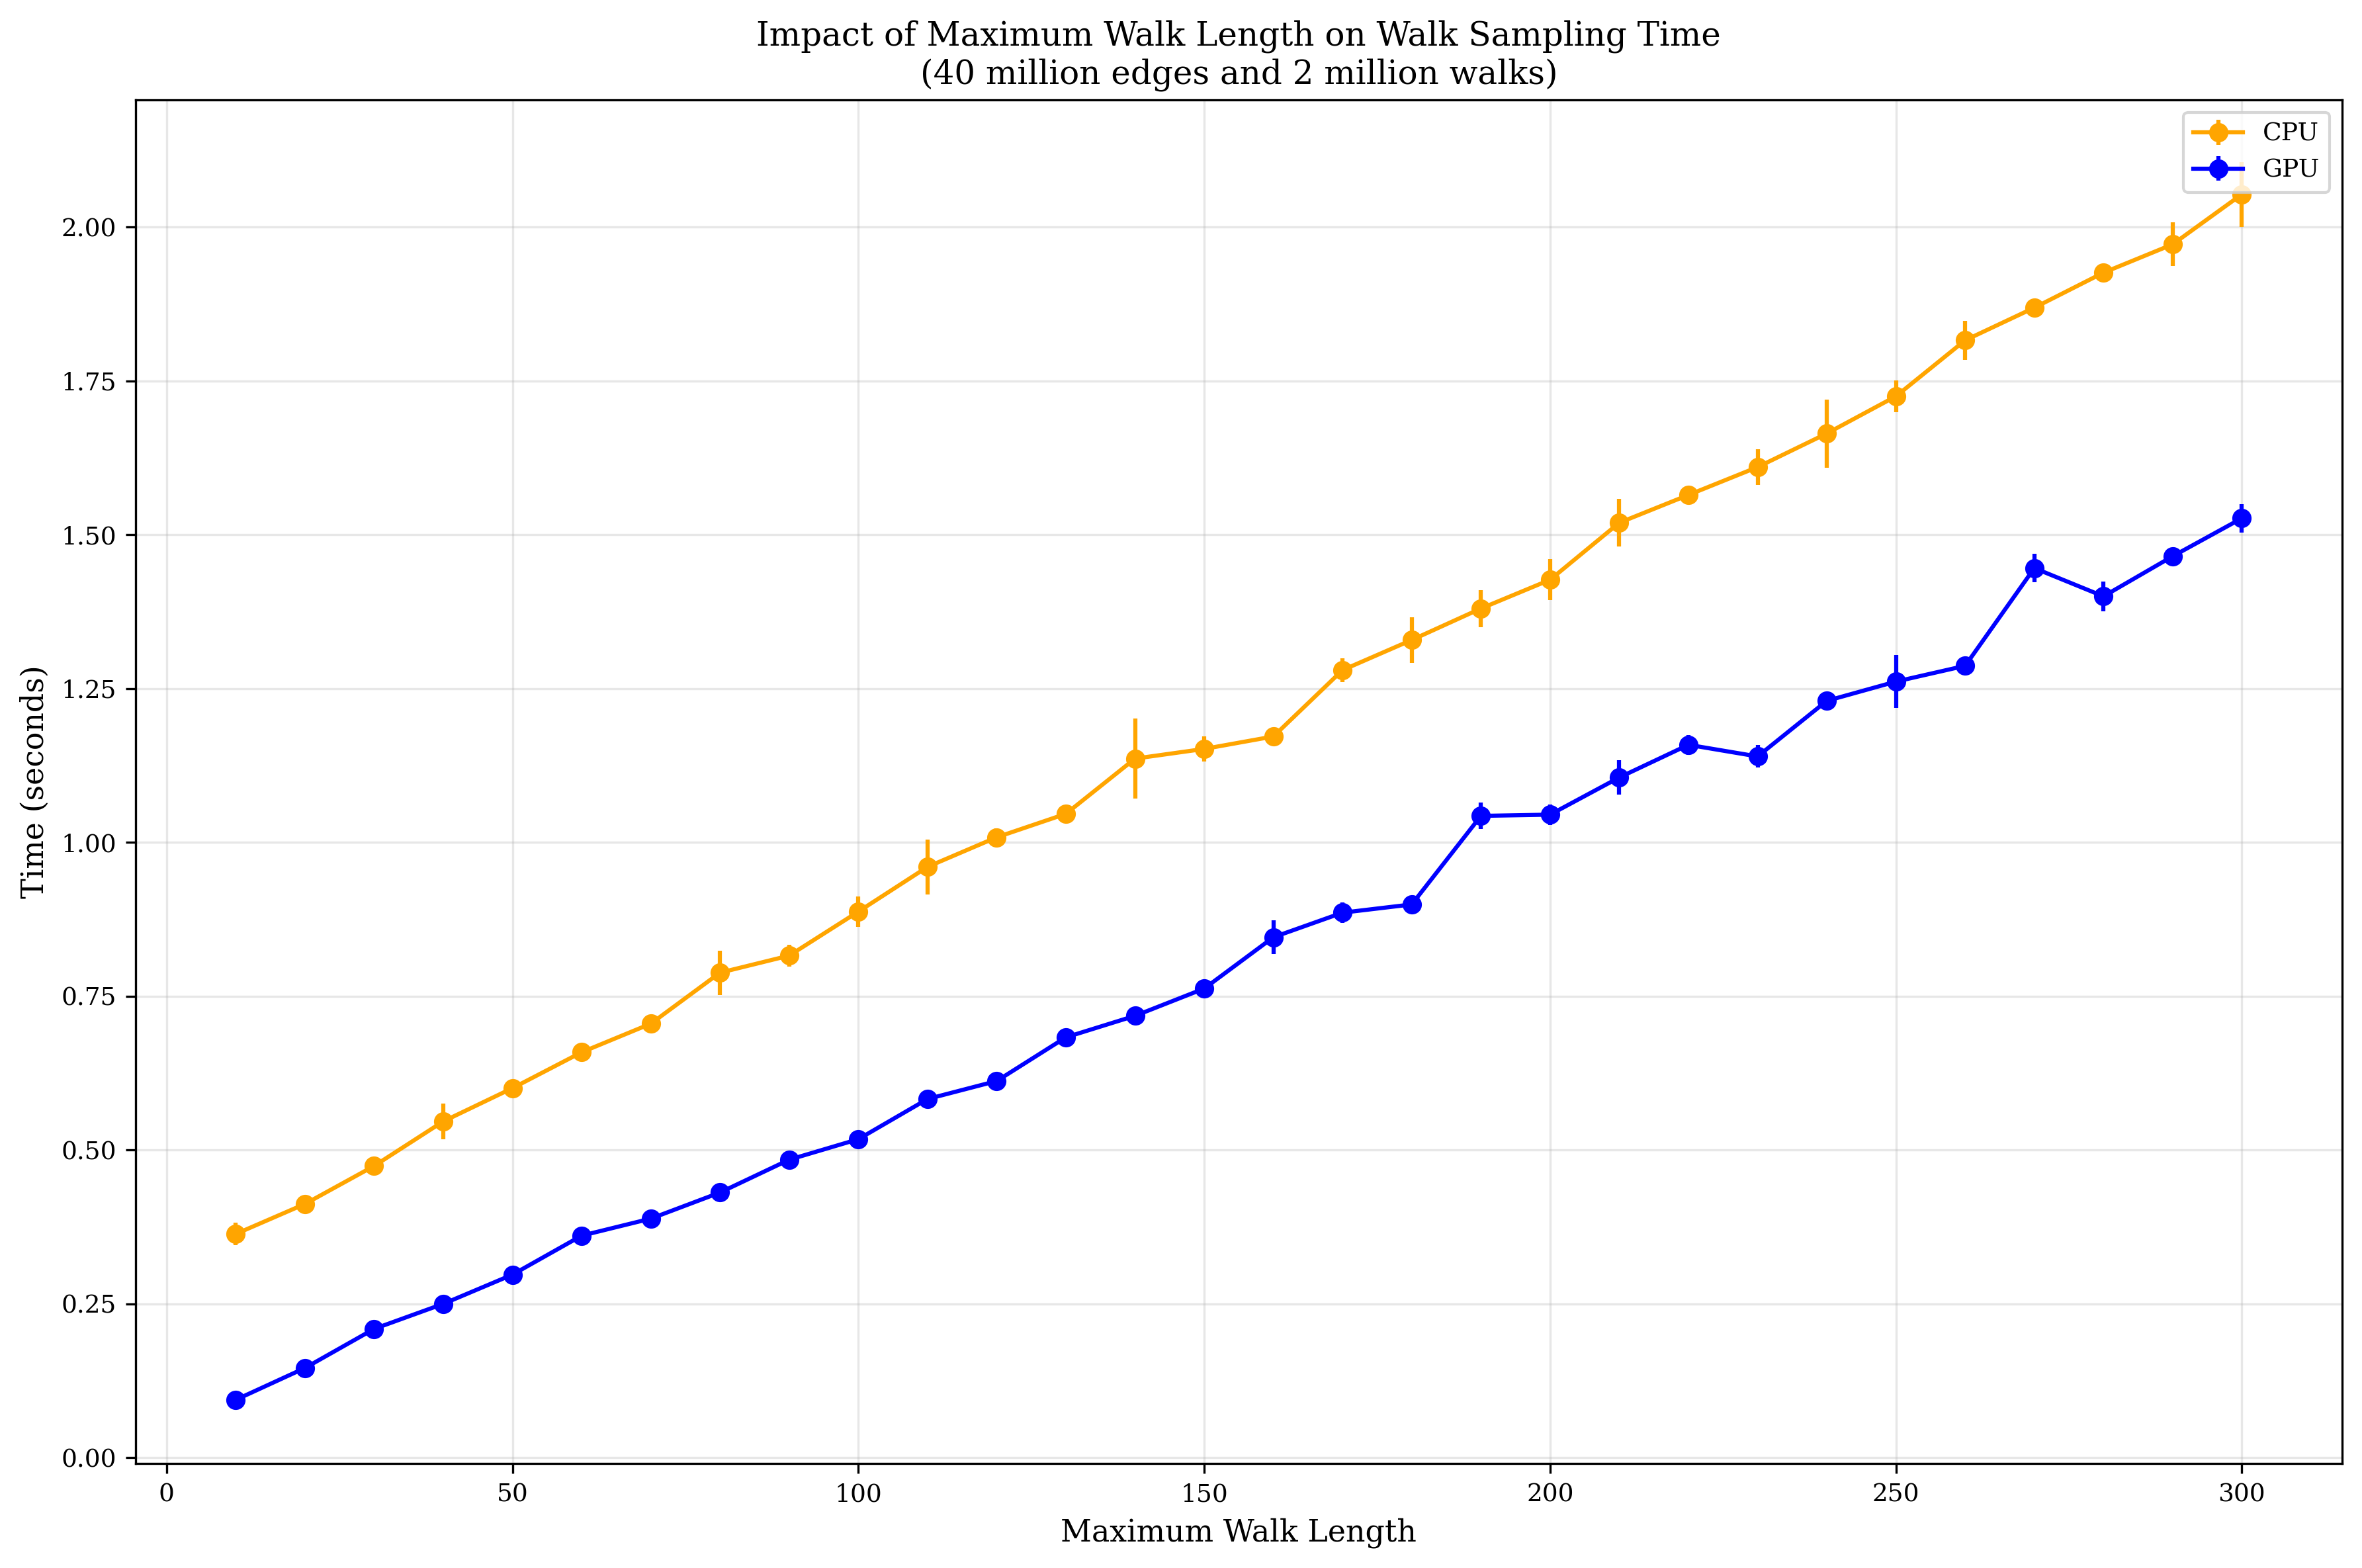

In [8]:
# Compute mean and std for each walk length
cpu_mean, cpu_std = compute_mean_std(cpu_results["max_walk_lens"]["walk_sampling_time"])
gpu_mean, gpu_std = compute_mean_std(gpu_results["max_walk_lens"]["walk_sampling_time"])

# Plot
plt.figure(figsize=(12, 8))

plt.errorbar(walk_lengths, cpu_mean, yerr=cpu_std,
             fmt='o-', color='orange', label="CPU")

plt.errorbar(walk_lengths, gpu_mean, yerr=gpu_std,
             fmt='o-', color='blue', label="GPU")

plt.xlabel("Maximum Walk Length")
plt.ylabel("Time (seconds)")
plt.title("Impact of Maximum Walk Length on Walk Sampling Time\n(40 million edges and 2 million walks)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("plots/plot3_walk_length_impact.png")
plt.show()

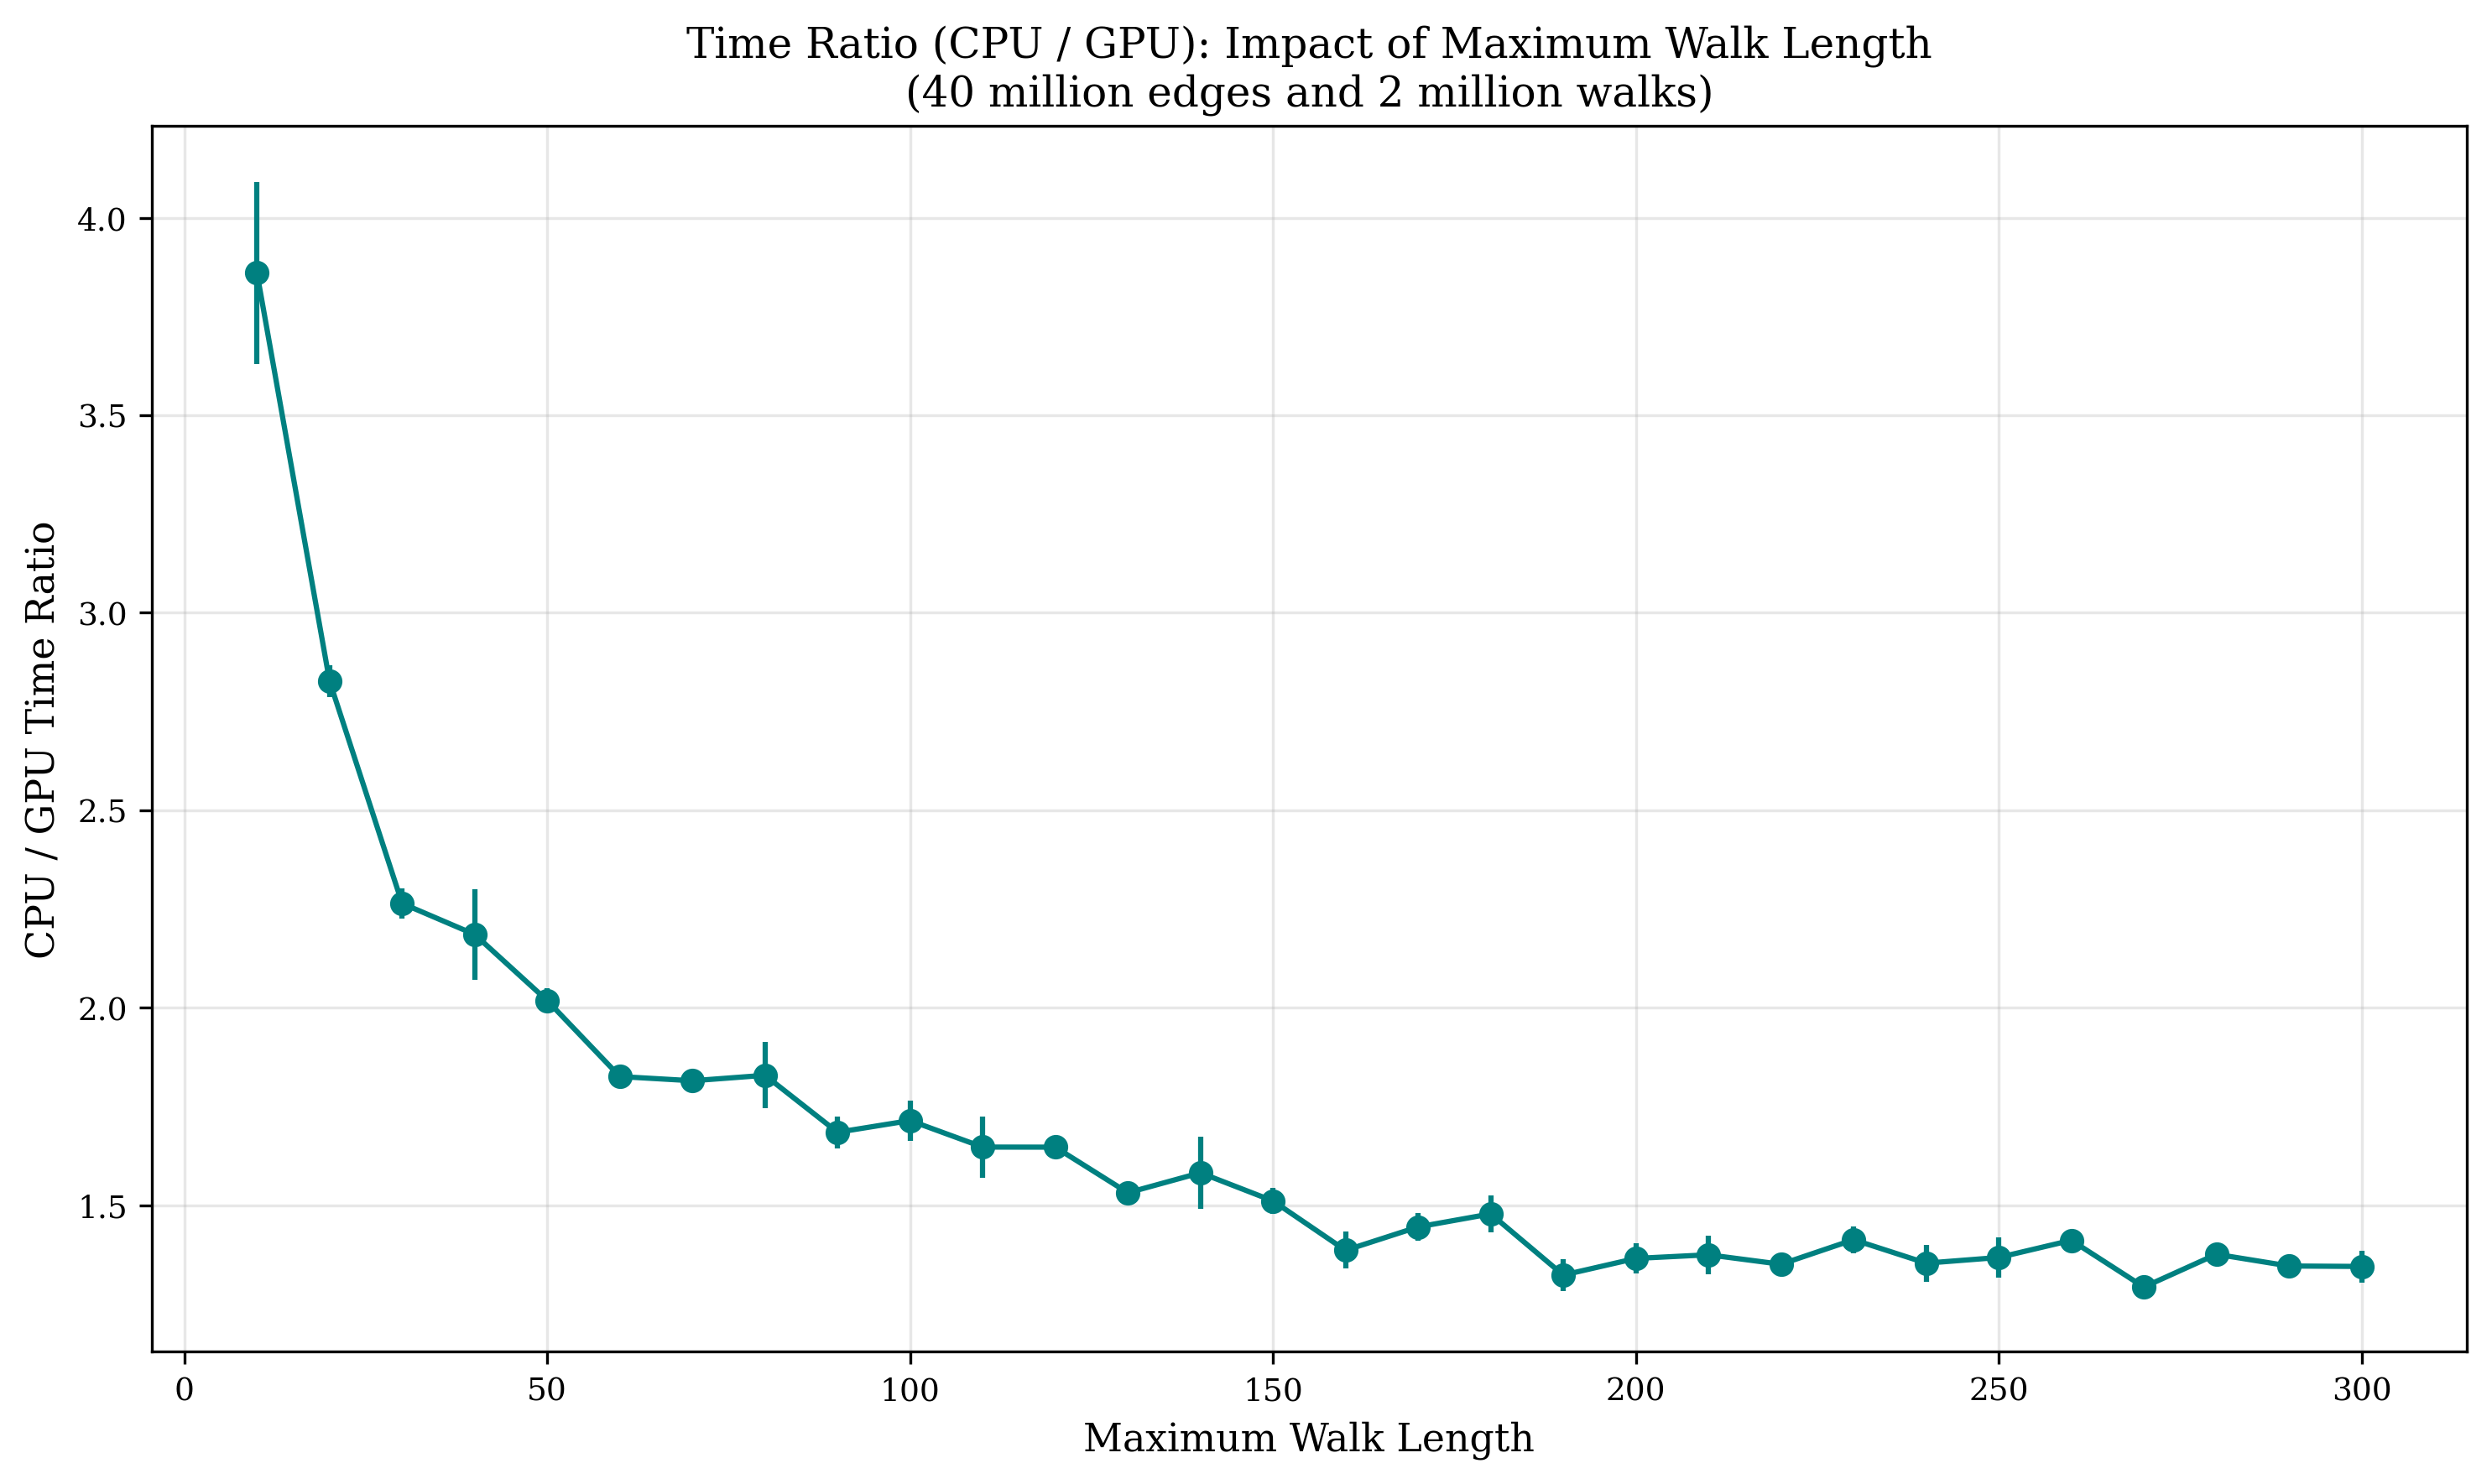

In [9]:
# 1. Compute mean and std
cpu_mean, cpu_std = compute_mean_std(cpu_results["max_walk_lens"]["walk_sampling_time"])
gpu_mean, gpu_std = compute_mean_std(gpu_results["max_walk_lens"]["walk_sampling_time"])

# 2. Compute ratios and propagated error
ratios = cpu_mean / gpu_mean
ratios_std = ratios * np.sqrt((cpu_std / cpu_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

# 3. Plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(walk_lengths, ratios, yerr=ratios_std, fmt='o-', color='teal')

plt.xlabel("Maximum Walk Length")
plt.ylabel("CPU / GPU Time Ratio")
plt.title("Time Ratio (CPU / GPU): Impact of Maximum Walk Length\n(40 million edges and 2 million walks)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/ratio_plot3_walk_length.png")
plt.show()

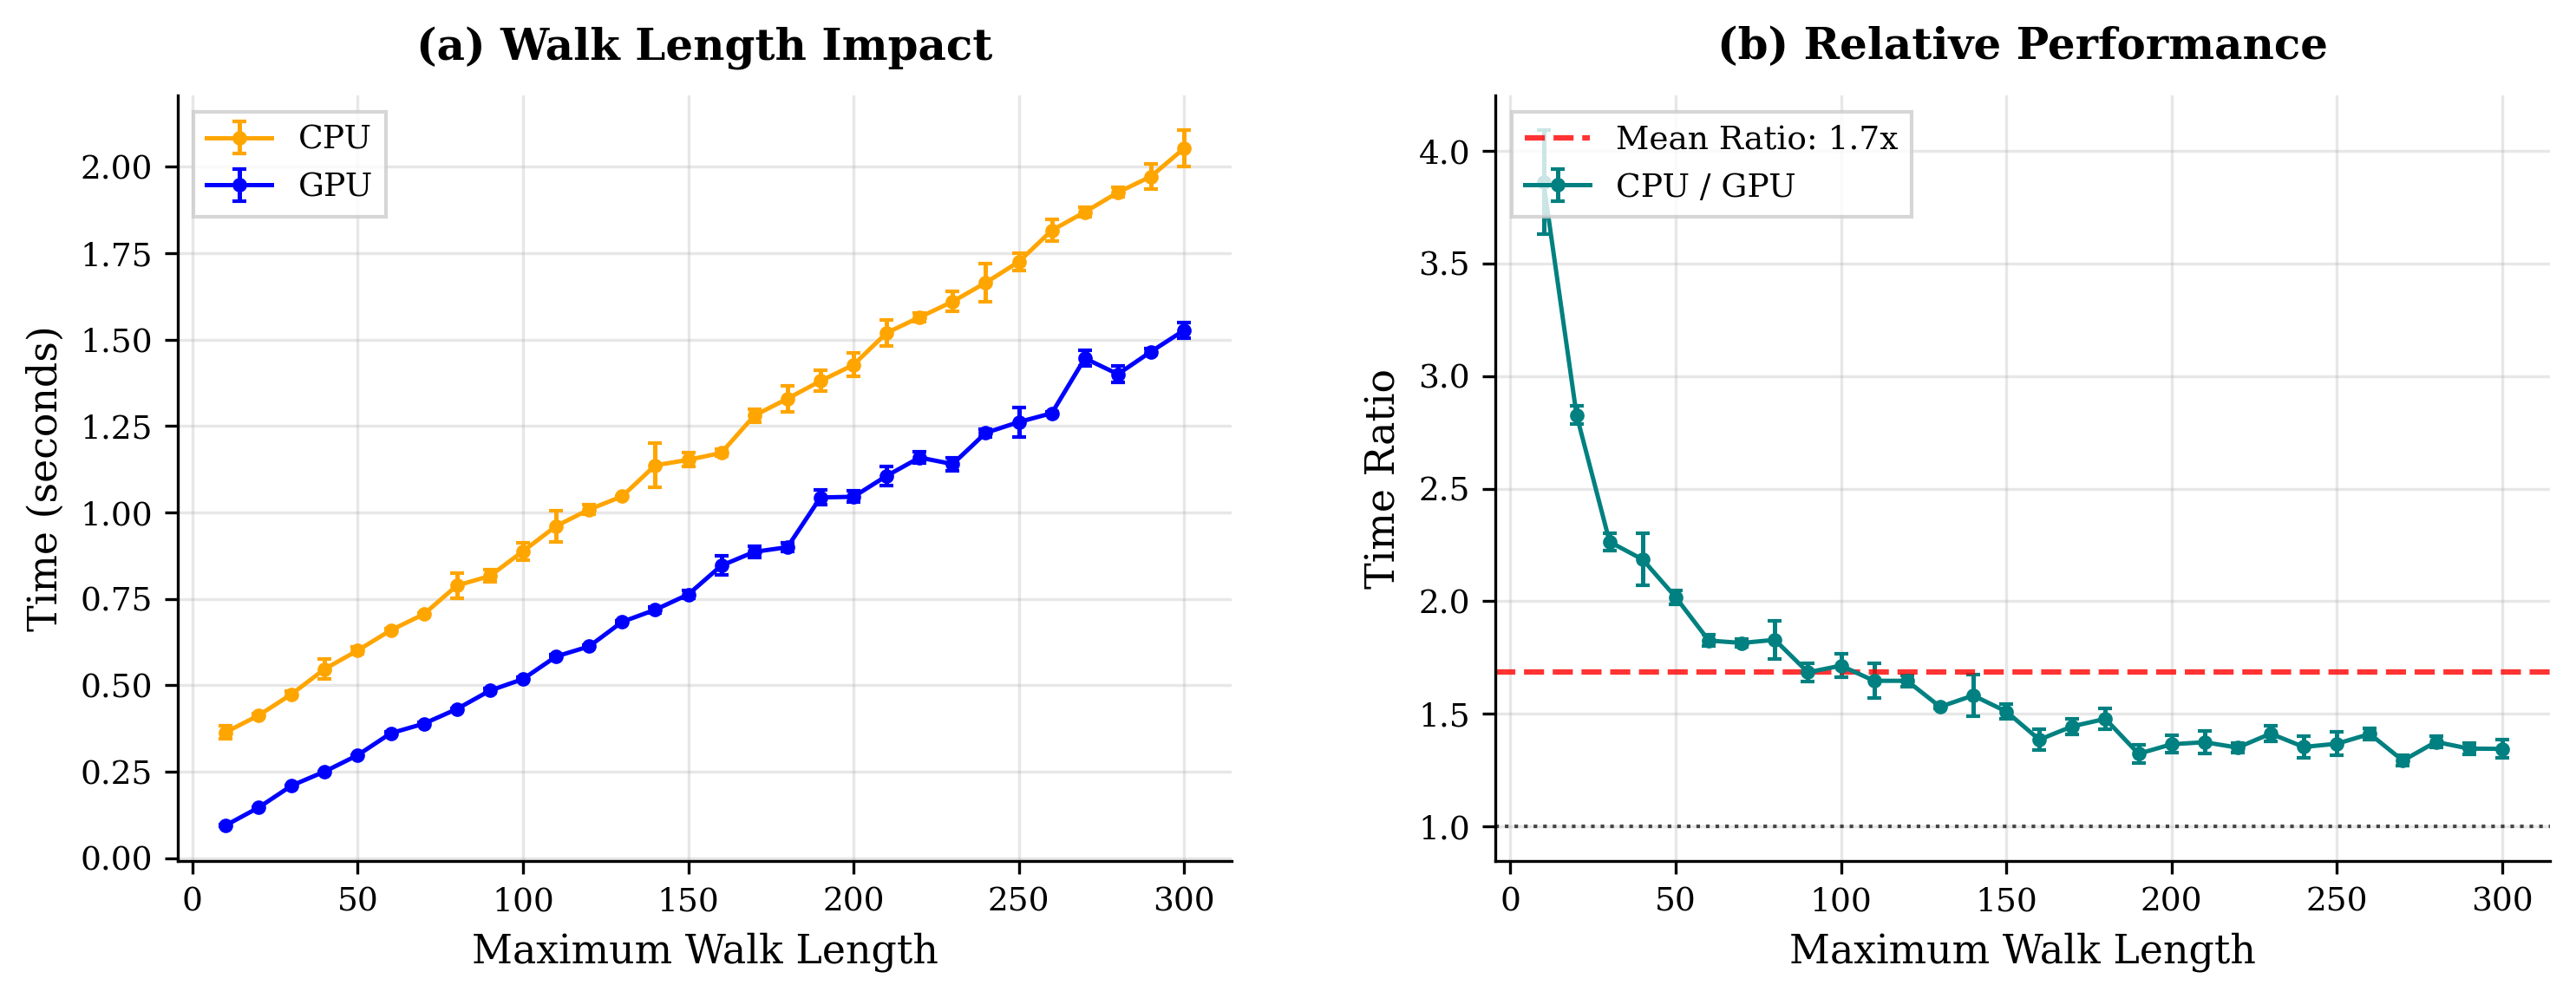

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Academic color scheme - matching your original colors
colors = {
    'cpu': 'orange',
    'gpu': 'blue',
    'ratio': 'teal'
}

# Compute mean and std for each walk length
cpu_mean, cpu_std = compute_mean_std(cpu_results["max_walk_lens"]["walk_sampling_time"])
gpu_mean, gpu_std = compute_mean_std(gpu_results["max_walk_lens"]["walk_sampling_time"])

# Compute ratios and propagated error
ratios = cpu_mean / gpu_mean
ratios_std = ratios * np.sqrt((cpu_std / cpu_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

# Create 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# --- Left plot: Absolute Performance ---
ax1.errorbar(walk_lengths, cpu_mean, yerr=cpu_std,
             fmt='o-', color=colors['cpu'], label="CPU",
             markersize=3, linewidth=1.2, capsize=2)

ax1.errorbar(walk_lengths, gpu_mean, yerr=gpu_std,
             fmt='o-', color=colors['gpu'], label="GPU",
             markersize=3, linewidth=1.2, capsize=2)

ax1.set_xlabel("Maximum Walk Length")
ax1.set_ylabel("Time (seconds)")
ax1.set_title("(a) Walk Length Impact", fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# --- Right plot: Performance Ratios ---
ax2.errorbar(walk_lengths, ratios, yerr=ratios_std,
             fmt='o-', color=colors['ratio'], label='CPU / GPU',
             markersize=3, linewidth=1.2, capsize=2)

# Add horizontal lines for reference
ax2.axhline(y=1, color='black', linestyle=':', alpha=0.7, linewidth=1)

# Add mean ratio line
mean_ratio = np.mean(ratios)
ax2.axhline(y=mean_ratio, color='red', linestyle='--', alpha=0.8, linewidth=1.5,
            label=f'Mean Ratio: {mean_ratio:.1f}x')

ax2.set_xlabel("Maximum Walk Length")
ax2.set_ylabel("Time Ratio")
ax2.set_title("(b) Relative Performance", fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left', frameon=True, fancybox=False, fontsize=9)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88)  # Add space for suptitle

# Save with high quality
plt.savefig("plots/walk_length_combined_performance.pdf", format='pdf', bbox_inches='tight')
plt.savefig("plots/walk_length_combined_performance.png", format='png', bbox_inches='tight')
plt.show()

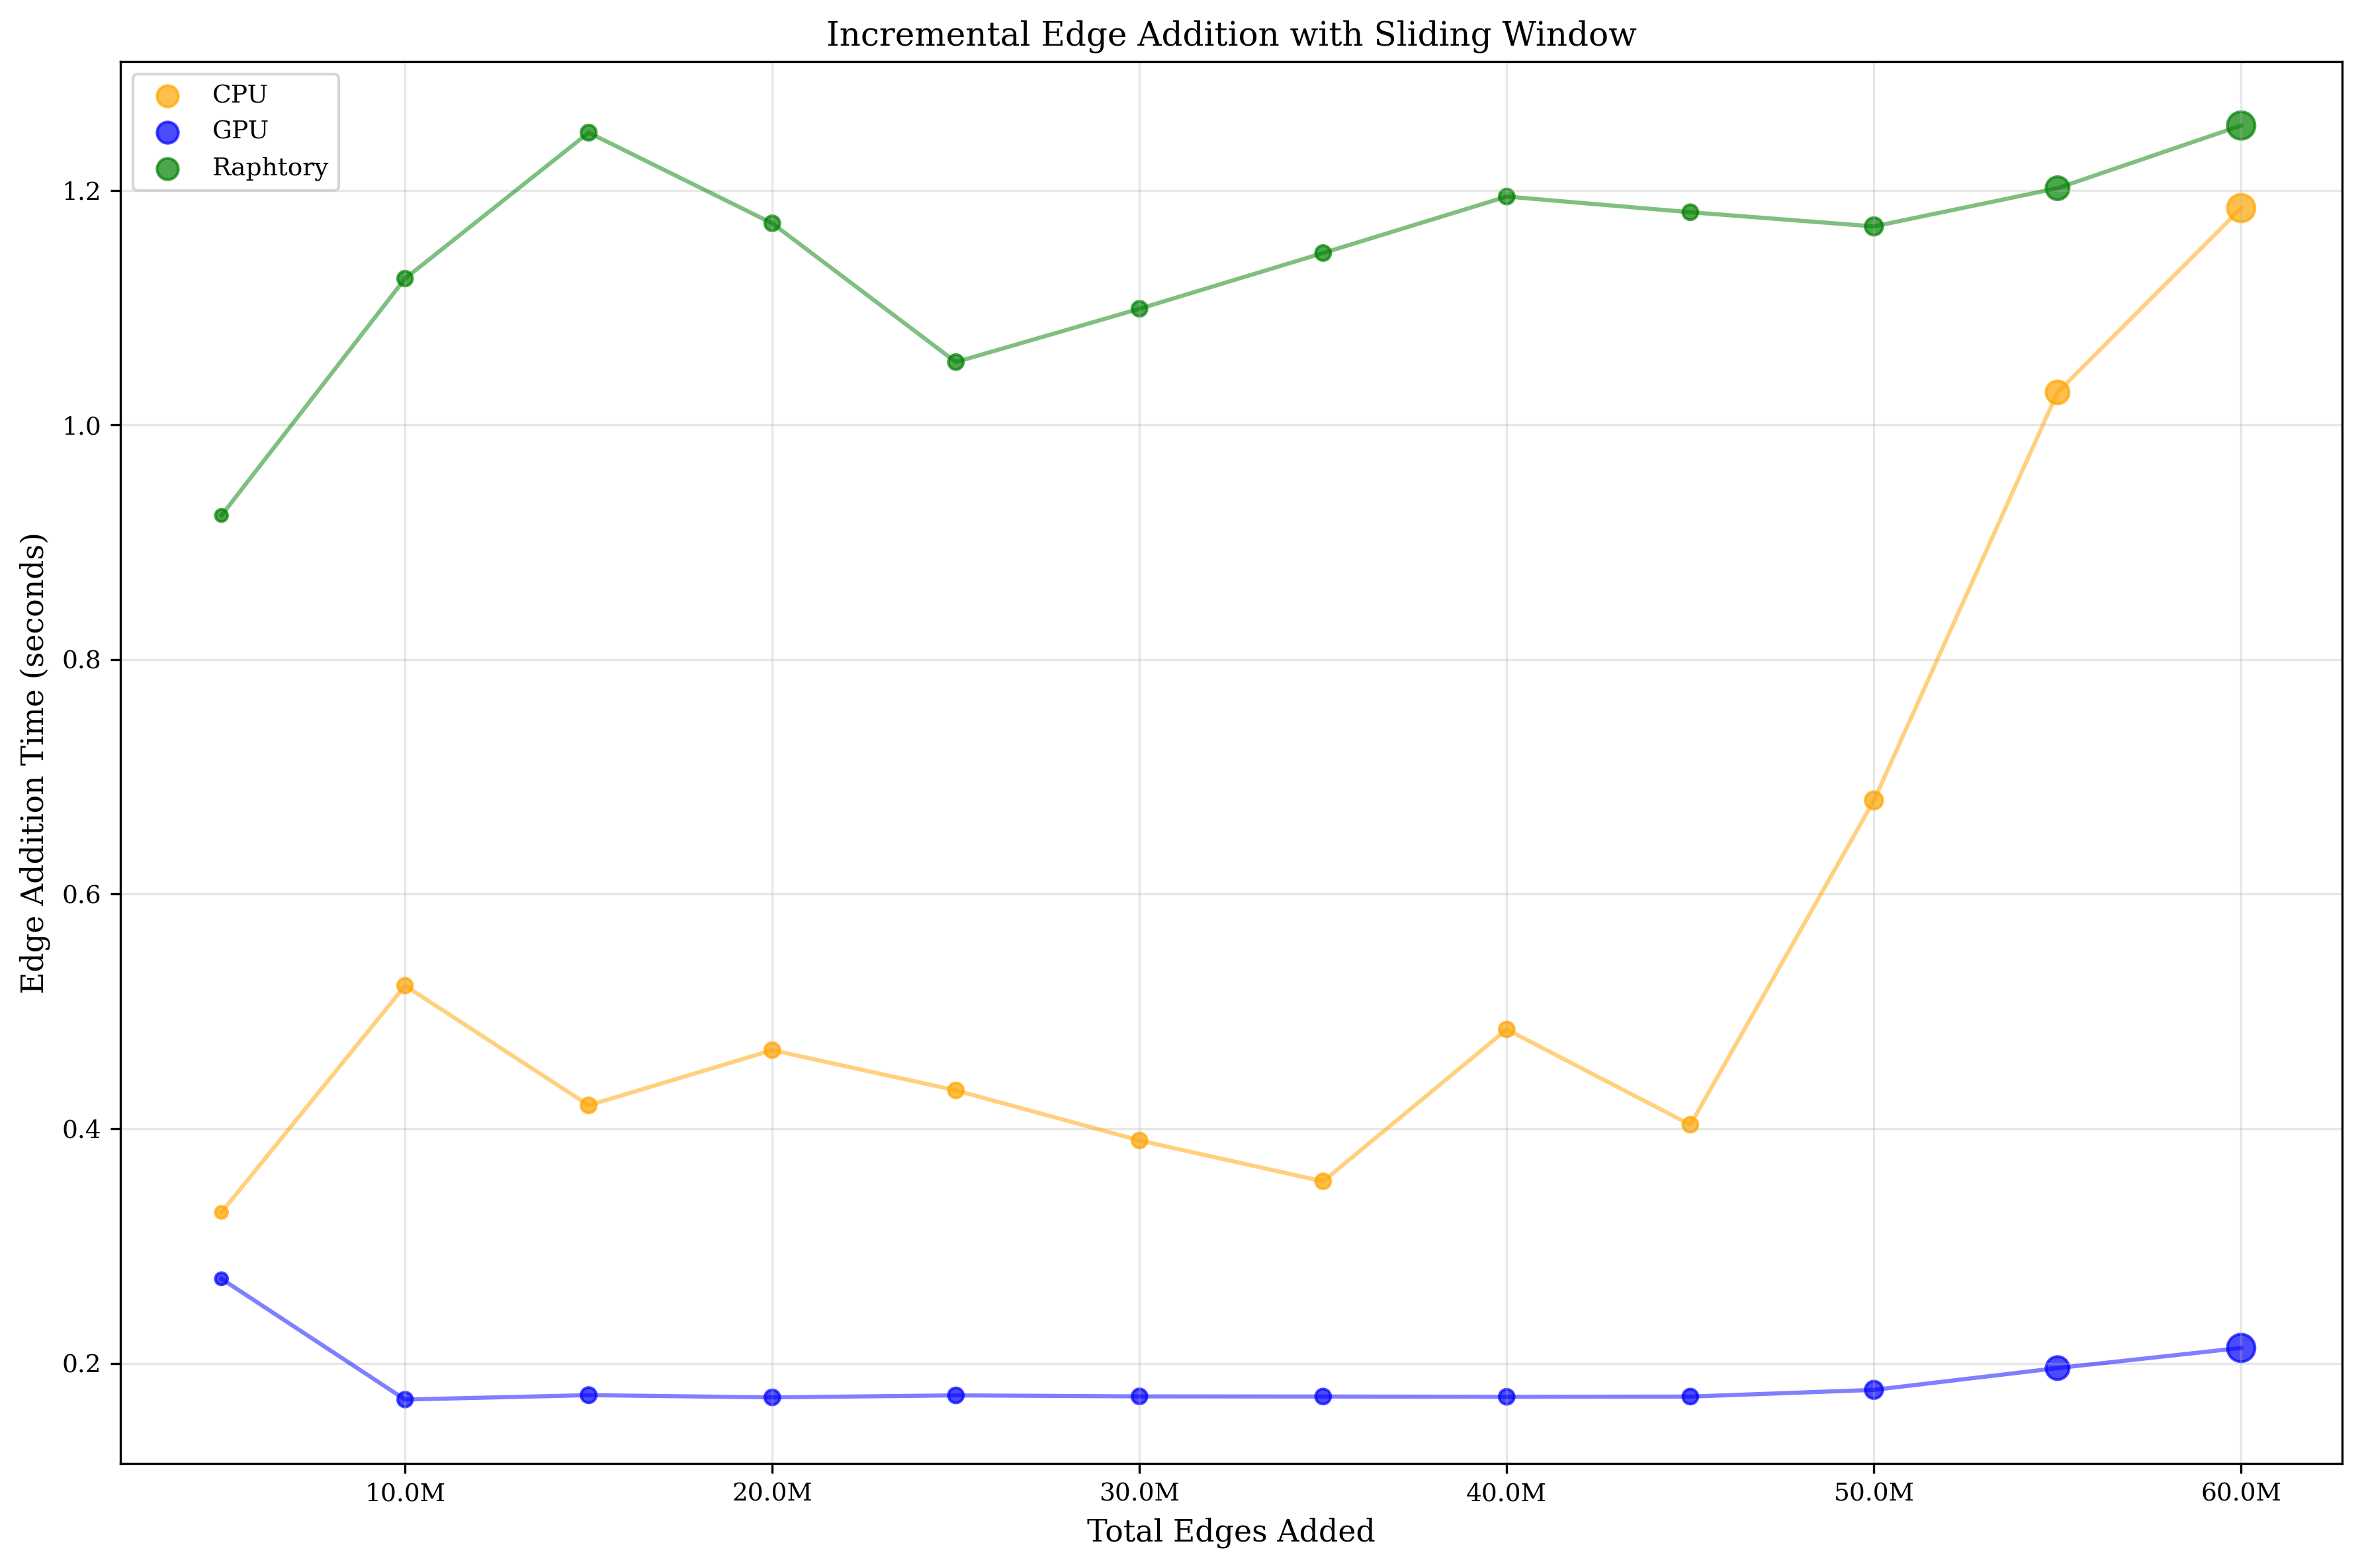

In [10]:
# Plot 4: Incremental Edge Addition with Active Edges
plt.figure(figsize=(12, 8))

# Create scatter plots with size indicating active edges
cpu_total_edges = cpu_results["incremental"]["total_edges"]
cpu_active_edges = cpu_results["incremental"]["active_edges"]
cpu_edge_addition_time = cpu_results["incremental"]["edge_addition_time"]

gpu_total_edges = gpu_results["incremental"]["total_edges"]
gpu_active_edges = gpu_results["incremental"]["active_edges"]
gpu_edge_addition_time = gpu_results["incremental"]["edge_addition_time"]
raphtory_edge_addition_time = raphtory_results["incremental"]

# Calculate normalized size for scatter points
max_active = max(max(cpu_active_edges), max(gpu_active_edges))
cpu_sizes = [100 * active / max_active for active in cpu_active_edges]
gpu_sizes = [100 * active / max_active for active in gpu_active_edges]

# Plot the data
sc_cpu = plt.scatter(cpu_total_edges, cpu_edge_addition_time,
                     s=cpu_sizes, c='orange', alpha=0.7, label="CPU")
sc_gpu = plt.scatter(gpu_total_edges, gpu_edge_addition_time,
                     s=gpu_sizes, c='blue', alpha=0.7, label="GPU")
sc_raphtory = plt.scatter(cpu_total_edges, raphtory_edge_addition_time,
                     s=cpu_sizes, c='green', alpha=0.7, label="Raphtory")

# Add lines to connect points
plt.plot(cpu_total_edges, cpu_edge_addition_time, 'orange', alpha=0.5)
plt.plot(gpu_total_edges, gpu_edge_addition_time, 'blue', alpha=0.5)
plt.plot(cpu_total_edges, raphtory_edge_addition_time, 'green', alpha=0.5)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xlabel("Total Edges Added")
plt.ylabel("Edge Addition Time (seconds)")
plt.title("Incremental Edge Addition with Sliding Window")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("plots/plot4_incremental_edge_addition.png")
plt.show()

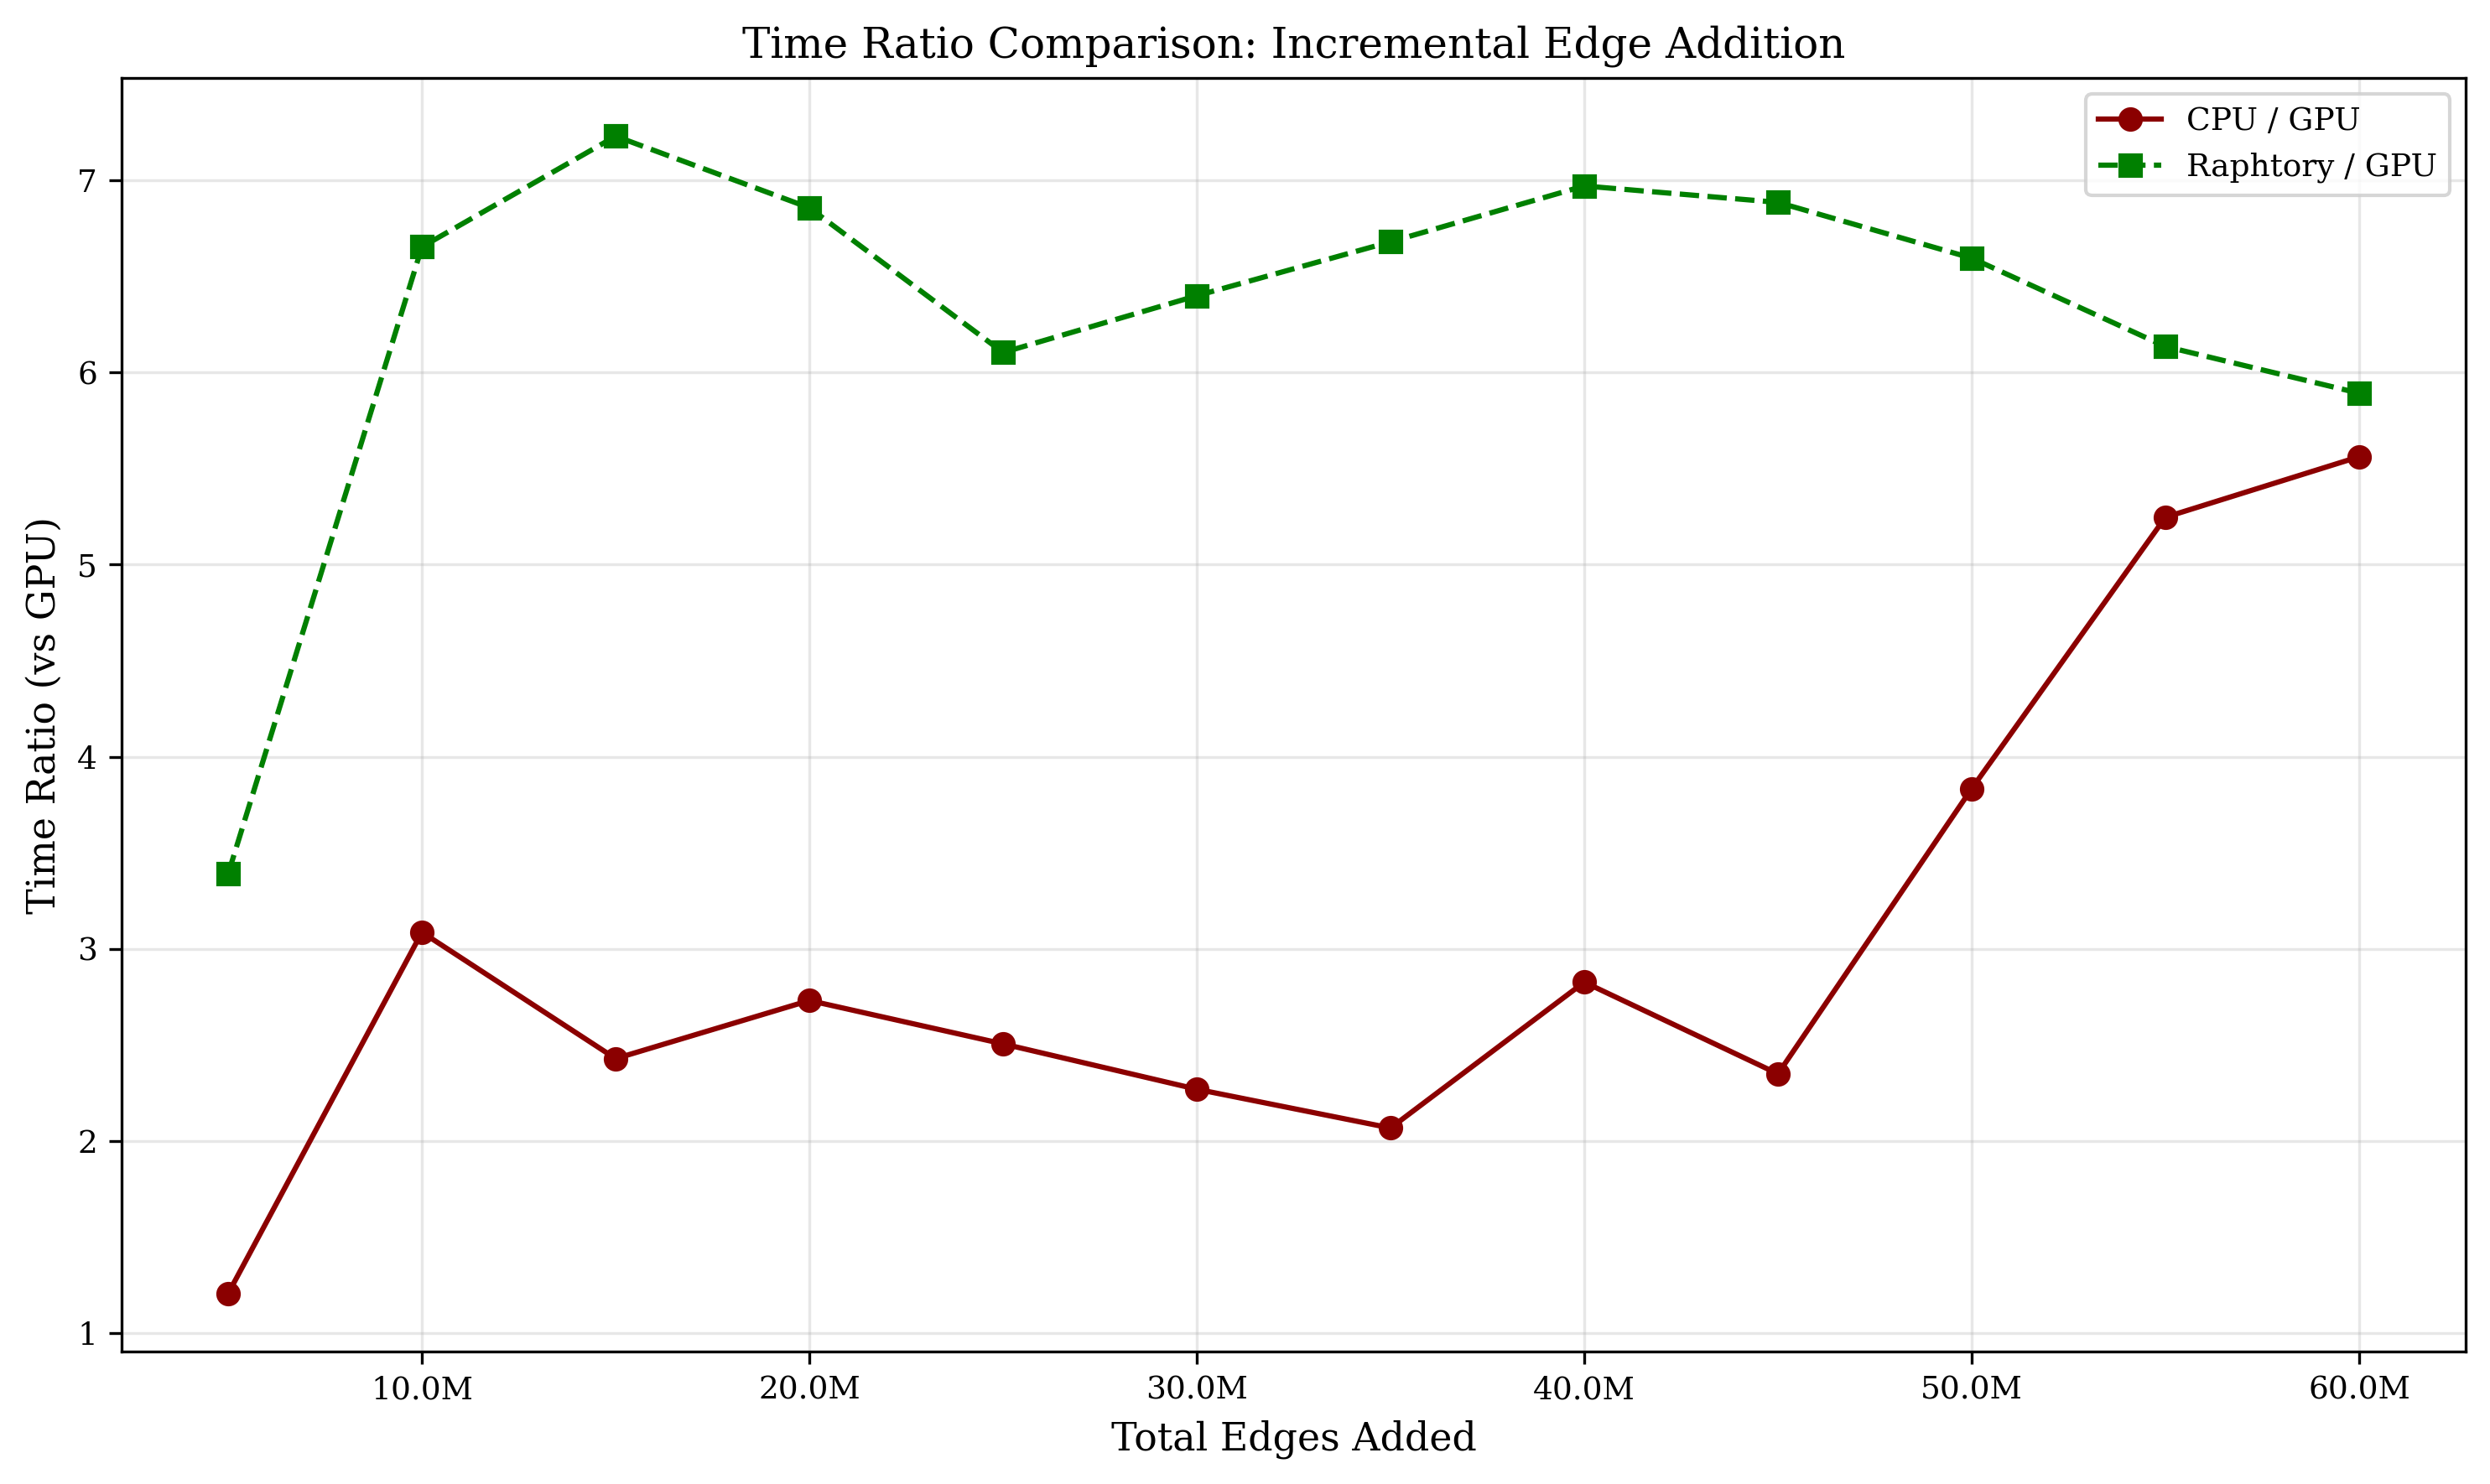

In [11]:
# CPU and GPU incremental times
cpu_times = cpu_results["incremental"]["edge_addition_time"]
gpu_times = gpu_results["incremental"]["edge_addition_time"]
raphtory_times = raphtory_results["incremental"]

# Compute ratios
ratios_cpu_gpu = [c / g if g != 0 else float('inf') for c, g in zip(cpu_times, gpu_times)]
ratios_raphtory_gpu = [r / g if g != 0 else float('inf') for r, g in zip(raphtory_times, gpu_times)]

# X-axis: total edges
total_edges = cpu_results["incremental"]["total_edges"]

# Plot
plt.figure(figsize=(10, 6))

plt.plot(total_edges, ratios_cpu_gpu, marker='o', linestyle='-', color='darkred', label="CPU / GPU")
plt.plot(total_edges, ratios_raphtory_gpu, marker='s', linestyle='--', color='green', label="Raphtory / GPU")

# Format
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xlabel("Total Edges Added")
plt.ylabel("Time Ratio (vs GPU)")
plt.title("Time Ratio Comparison: Incremental Edge Addition")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("plots/ratio_plot4_incremental_edge_addition.png")
plt.show()

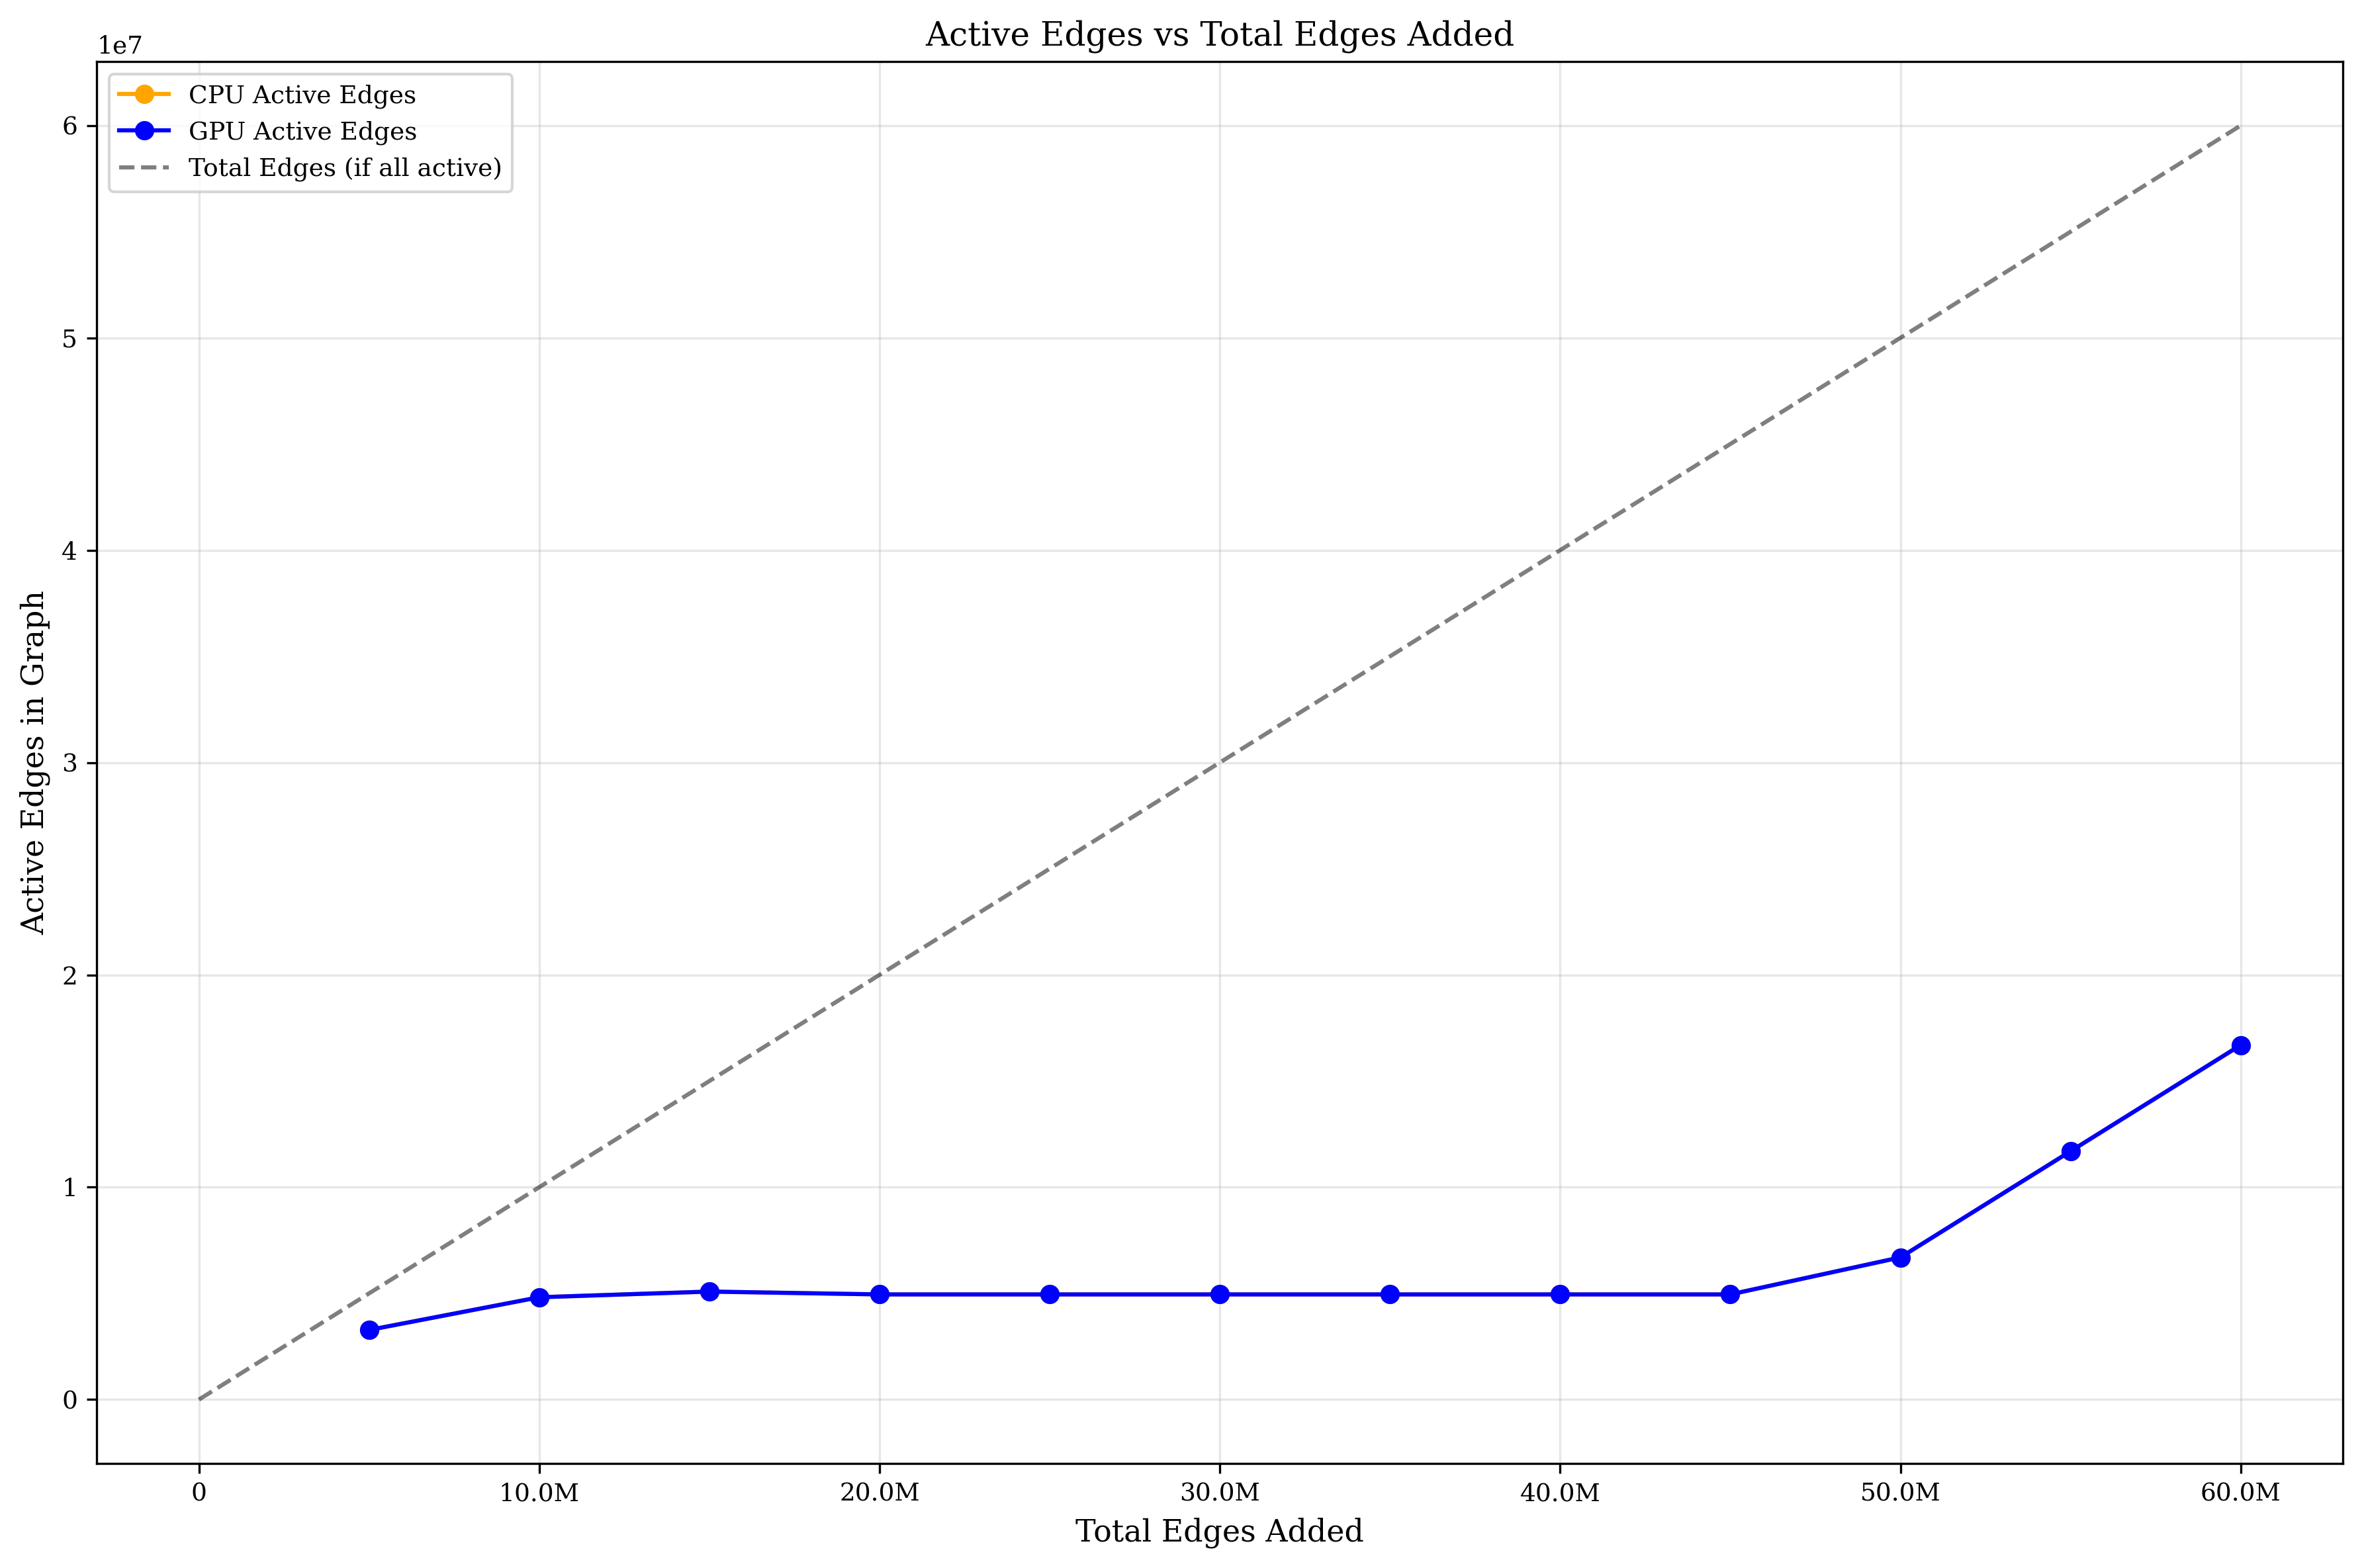

In [12]:
plt.figure(figsize=(12, 8))

# Plot active edges vs total edges
plt.plot(cpu_total_edges, cpu_active_edges, 'o-', color='orange', label="CPU Active Edges")
plt.plot(gpu_total_edges, gpu_active_edges, 'o-', color='blue', label="GPU Active Edges")

# Add a reference line showing total edges (y=x line)
max_total = max(max(cpu_total_edges), max(gpu_total_edges))
plt.plot([0, max_total], [0, max_total], 'k--', alpha=0.5, label="Total Edges (if all active)")

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
plt.xlabel("Total Edges Added")
plt.ylabel("Active Edges in Graph")
plt.title("Active Edges vs Total Edges Added")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("plots/plot5_total_vs_active_edges.png")
plt.show()

In [20]:
alibaba_data_gpu = pickle.load(open(f"{results_dir}/result_alibaba_streaming_GPU.pkl", "rb"))
alibaba_data_cpu = pickle.load(open(f"{results_dir}/result_alibaba_streaming_CPU.pkl", "rb"))

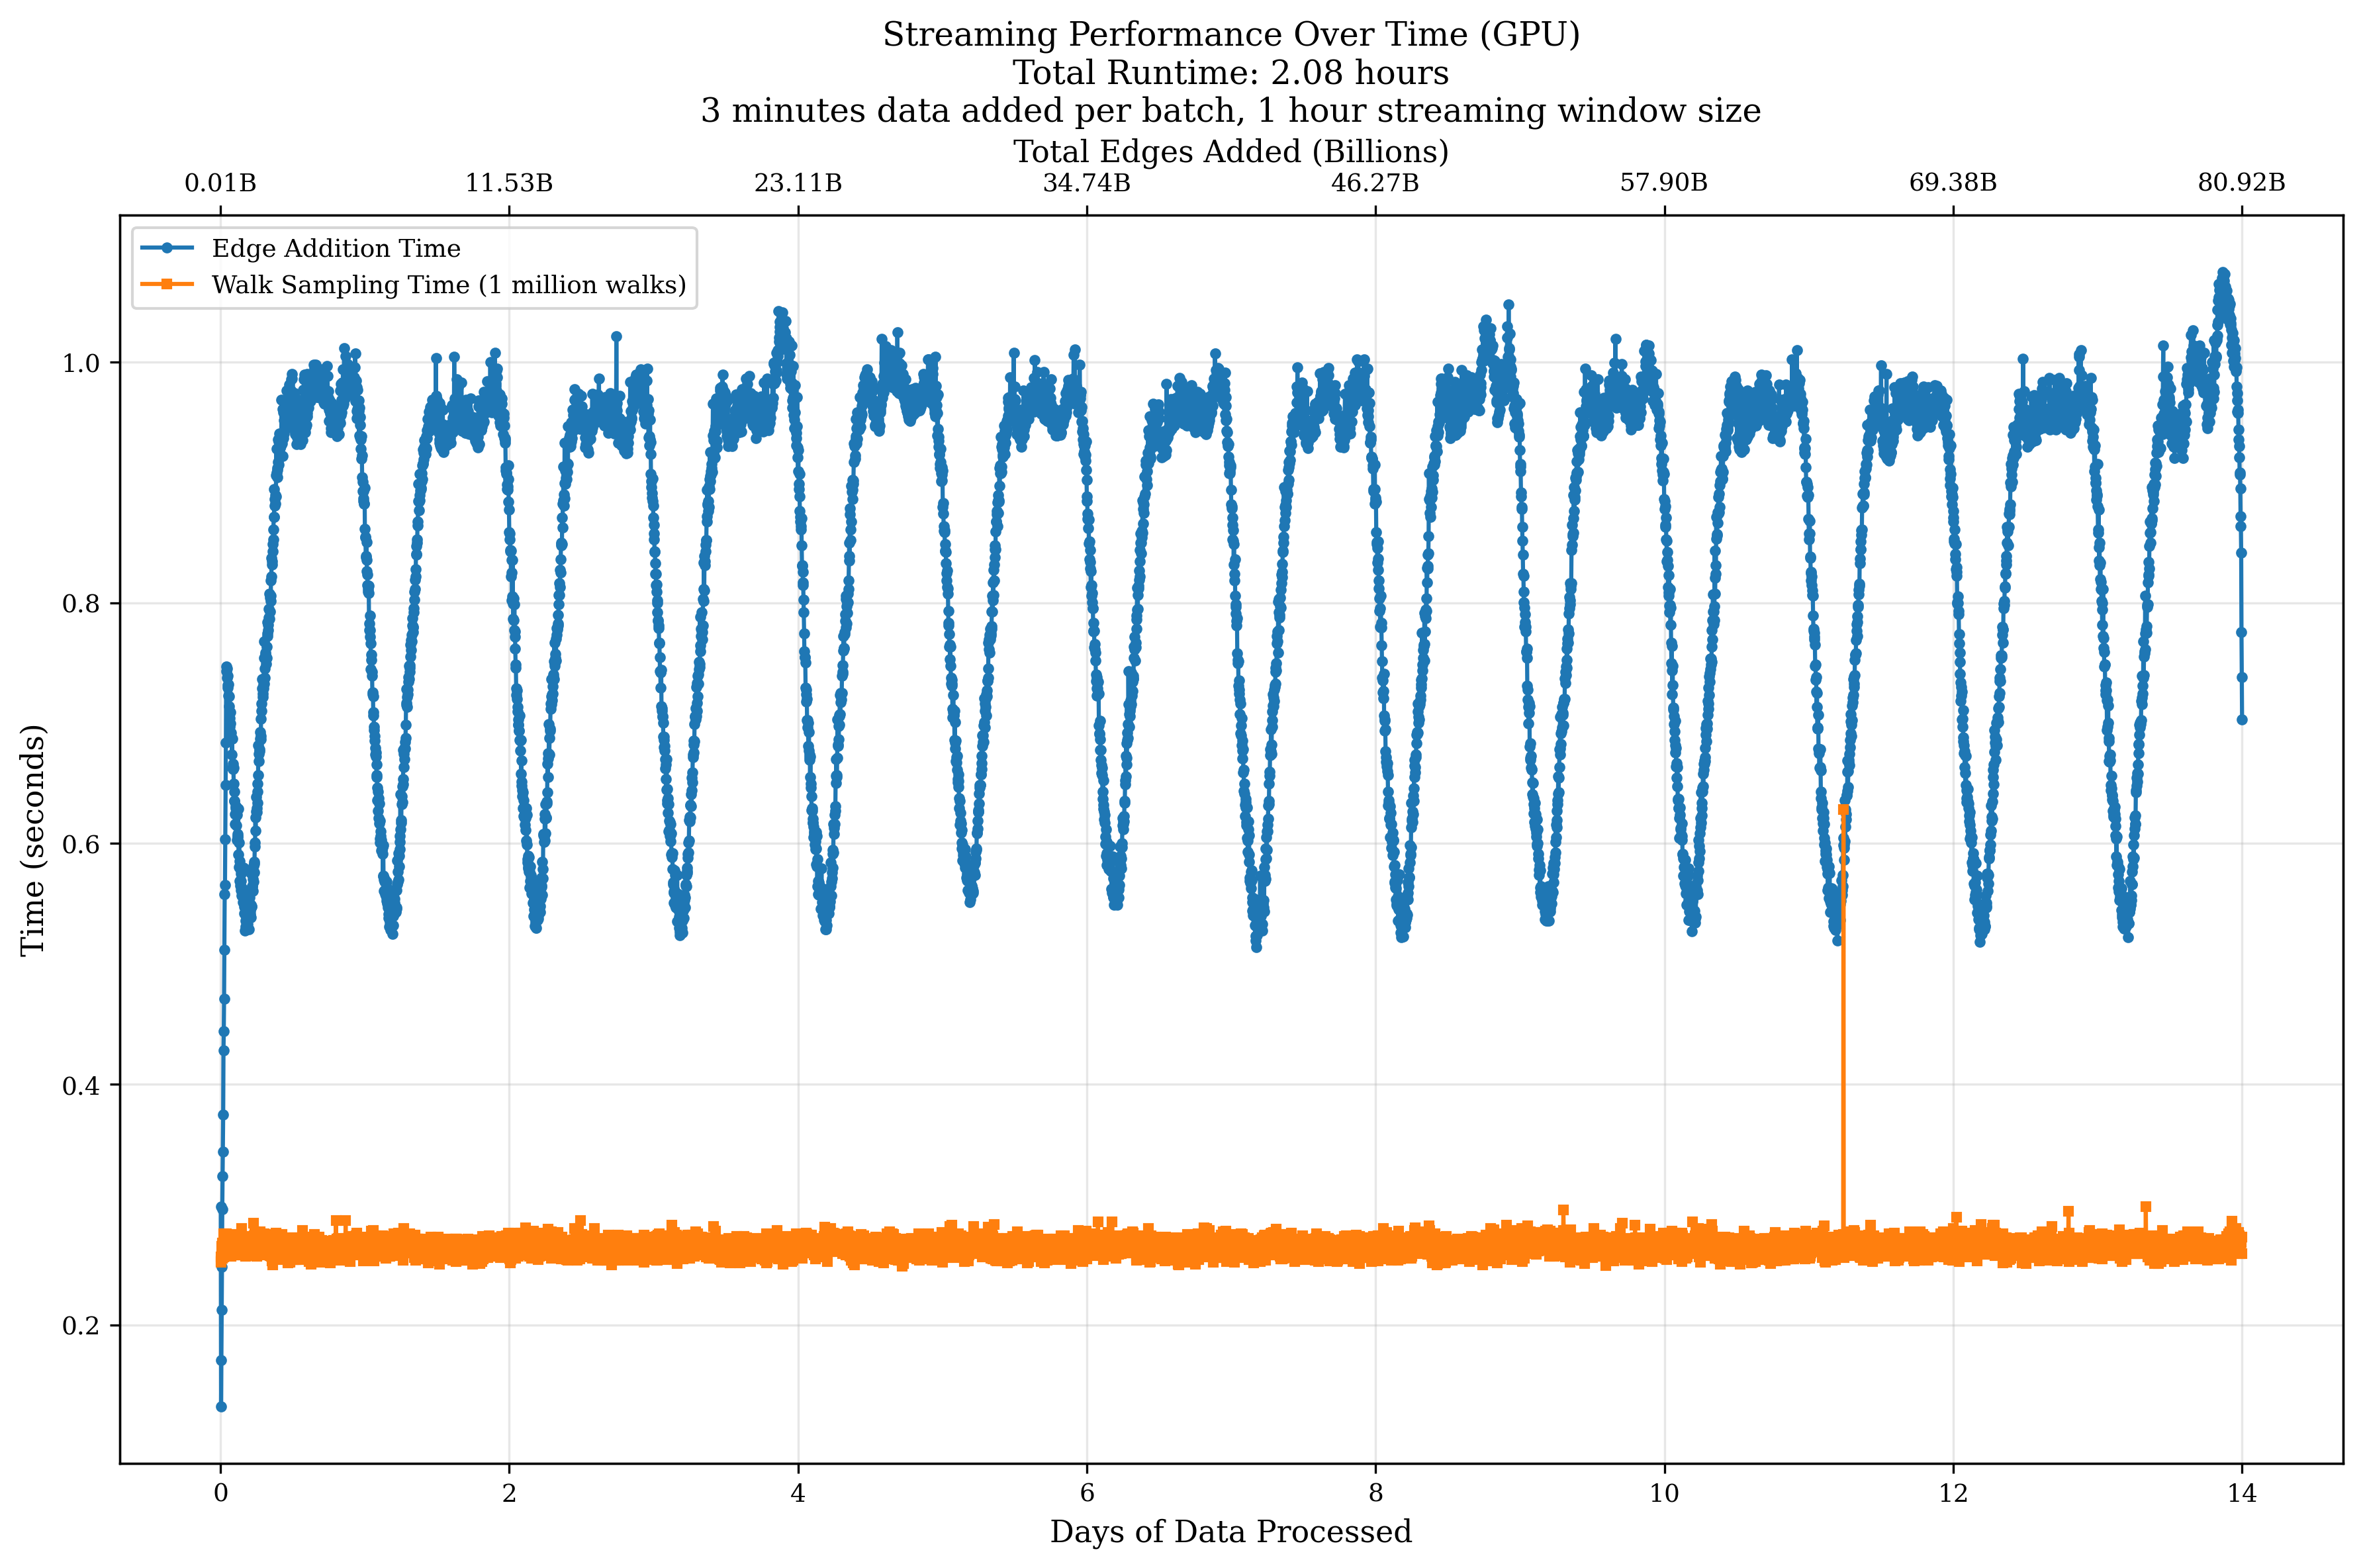

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Primary data
edge_addition_time = alibaba_data_gpu['edge_addition_time']
walk_sampling_time = alibaba_data_gpu['walk_sampling_time']
total_edges = alibaba_data_gpu['total_edges']

# Compute total runtime in hours
total_time = np.sum(edge_addition_time) + np.sum(walk_sampling_time)
total_time_hours = total_time / 3600  # convert seconds to hours

# X-axis labels
minutes_per_step = 3
steps = list(range(1, len(edge_addition_time) + 1))
step_labels_minutes = [s * minutes_per_step for s in steps]
step_labels_days = [m / 1440 for m in step_labels_minutes]  # 1440 mins/day

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot edge and walk times over days
ax1.plot(step_labels_days, edge_addition_time, label='Edge Addition Time', marker='o', markersize=3, linestyle='-')
ax1.plot(step_labels_days, walk_sampling_time, label='Walk Sampling Time (1 million walks)', marker='s', markersize=3, linestyle='-')

ax1.set_xlabel("Days of Data Processed")
ax1.set_ylabel("Time (seconds)")
ax1.set_title(f"Streaming Performance Over Time (GPU)\nTotal Runtime: {total_time_hours:.2f} hours\n3 minutes data added per batch, 1 hour streaming window size")
ax1.grid(True, alpha=0.3)
ax1.legend()

# --- Secondary X-axis: Total edges added in billions ---
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))
ax2.set_xlabel("Total Edges Added (Billions)")

plt.tight_layout()
plt.savefig("plots/alibaba_gpu.png")
plt.show()

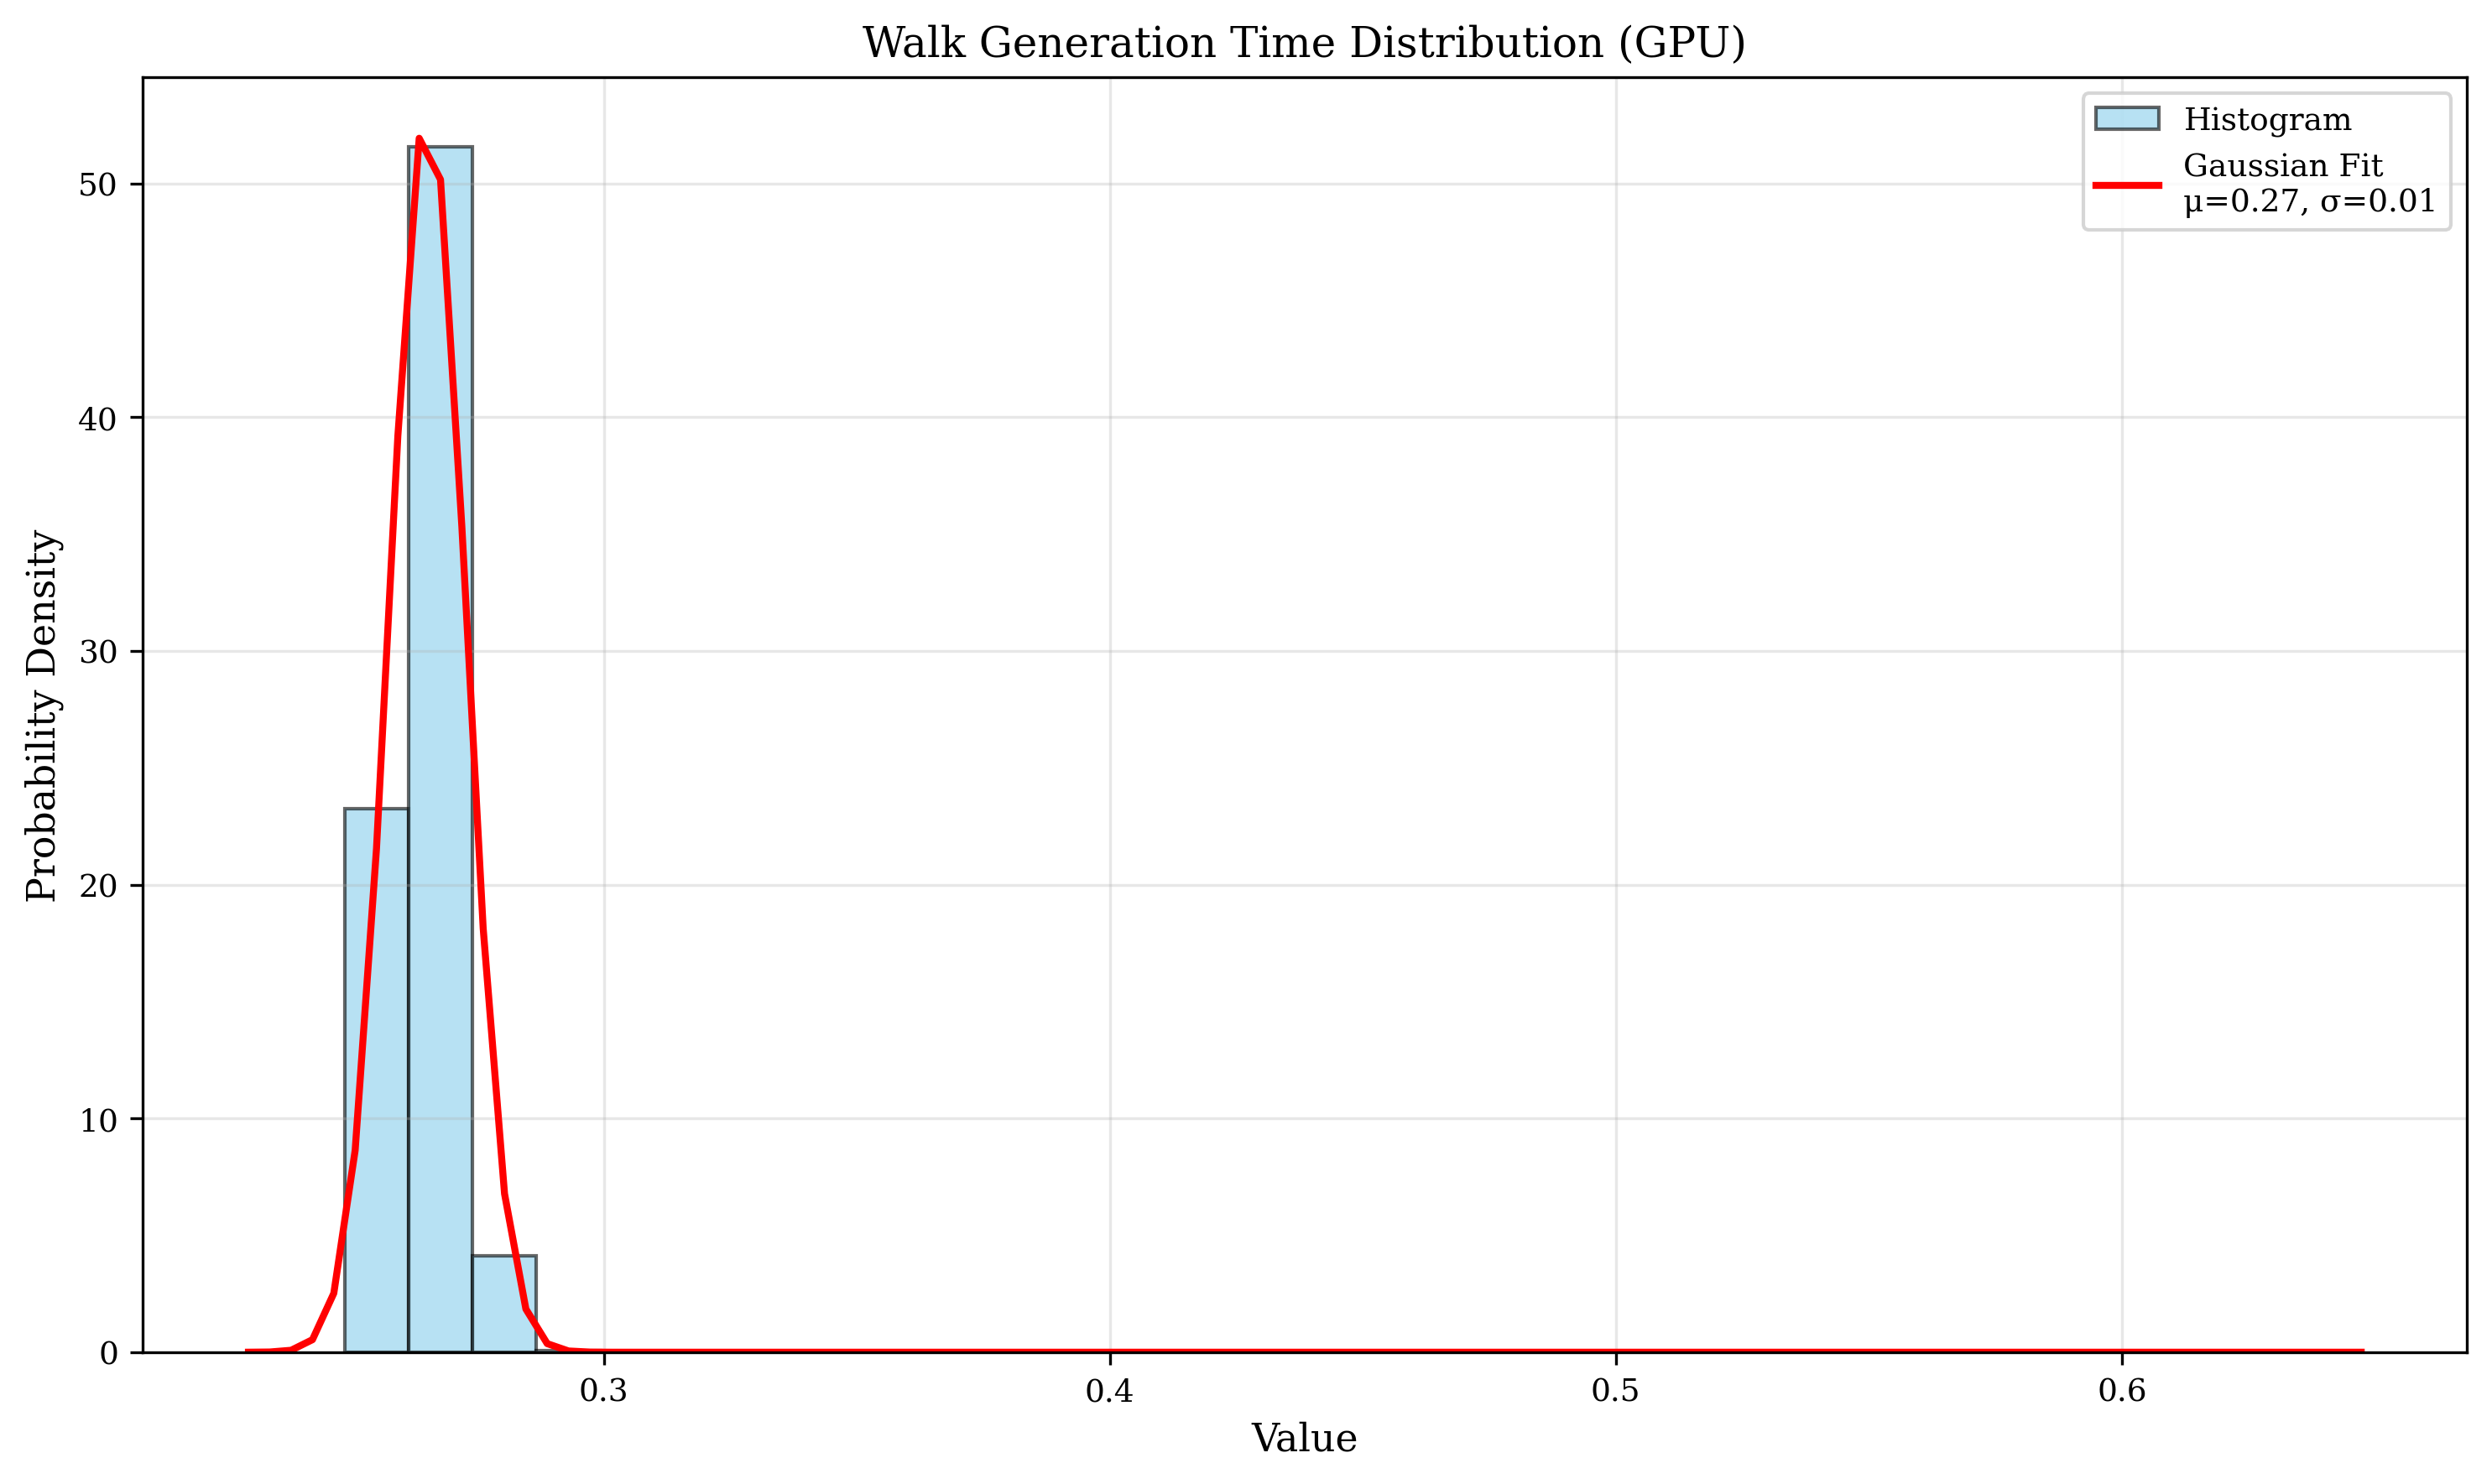

In [22]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

mu, std = norm.fit(alibaba_data_gpu['walk_sampling_time'])

# Plot histogram of the data
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(alibaba_data_gpu['walk_sampling_time'], bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label=f'Gaussian Fit\nμ={mu:.2f}, σ={std:.2f}')

plt.title('Walk Generation Time Distribution (GPU)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('plots/gpu_walk_time_distribution.png')
plt.show()

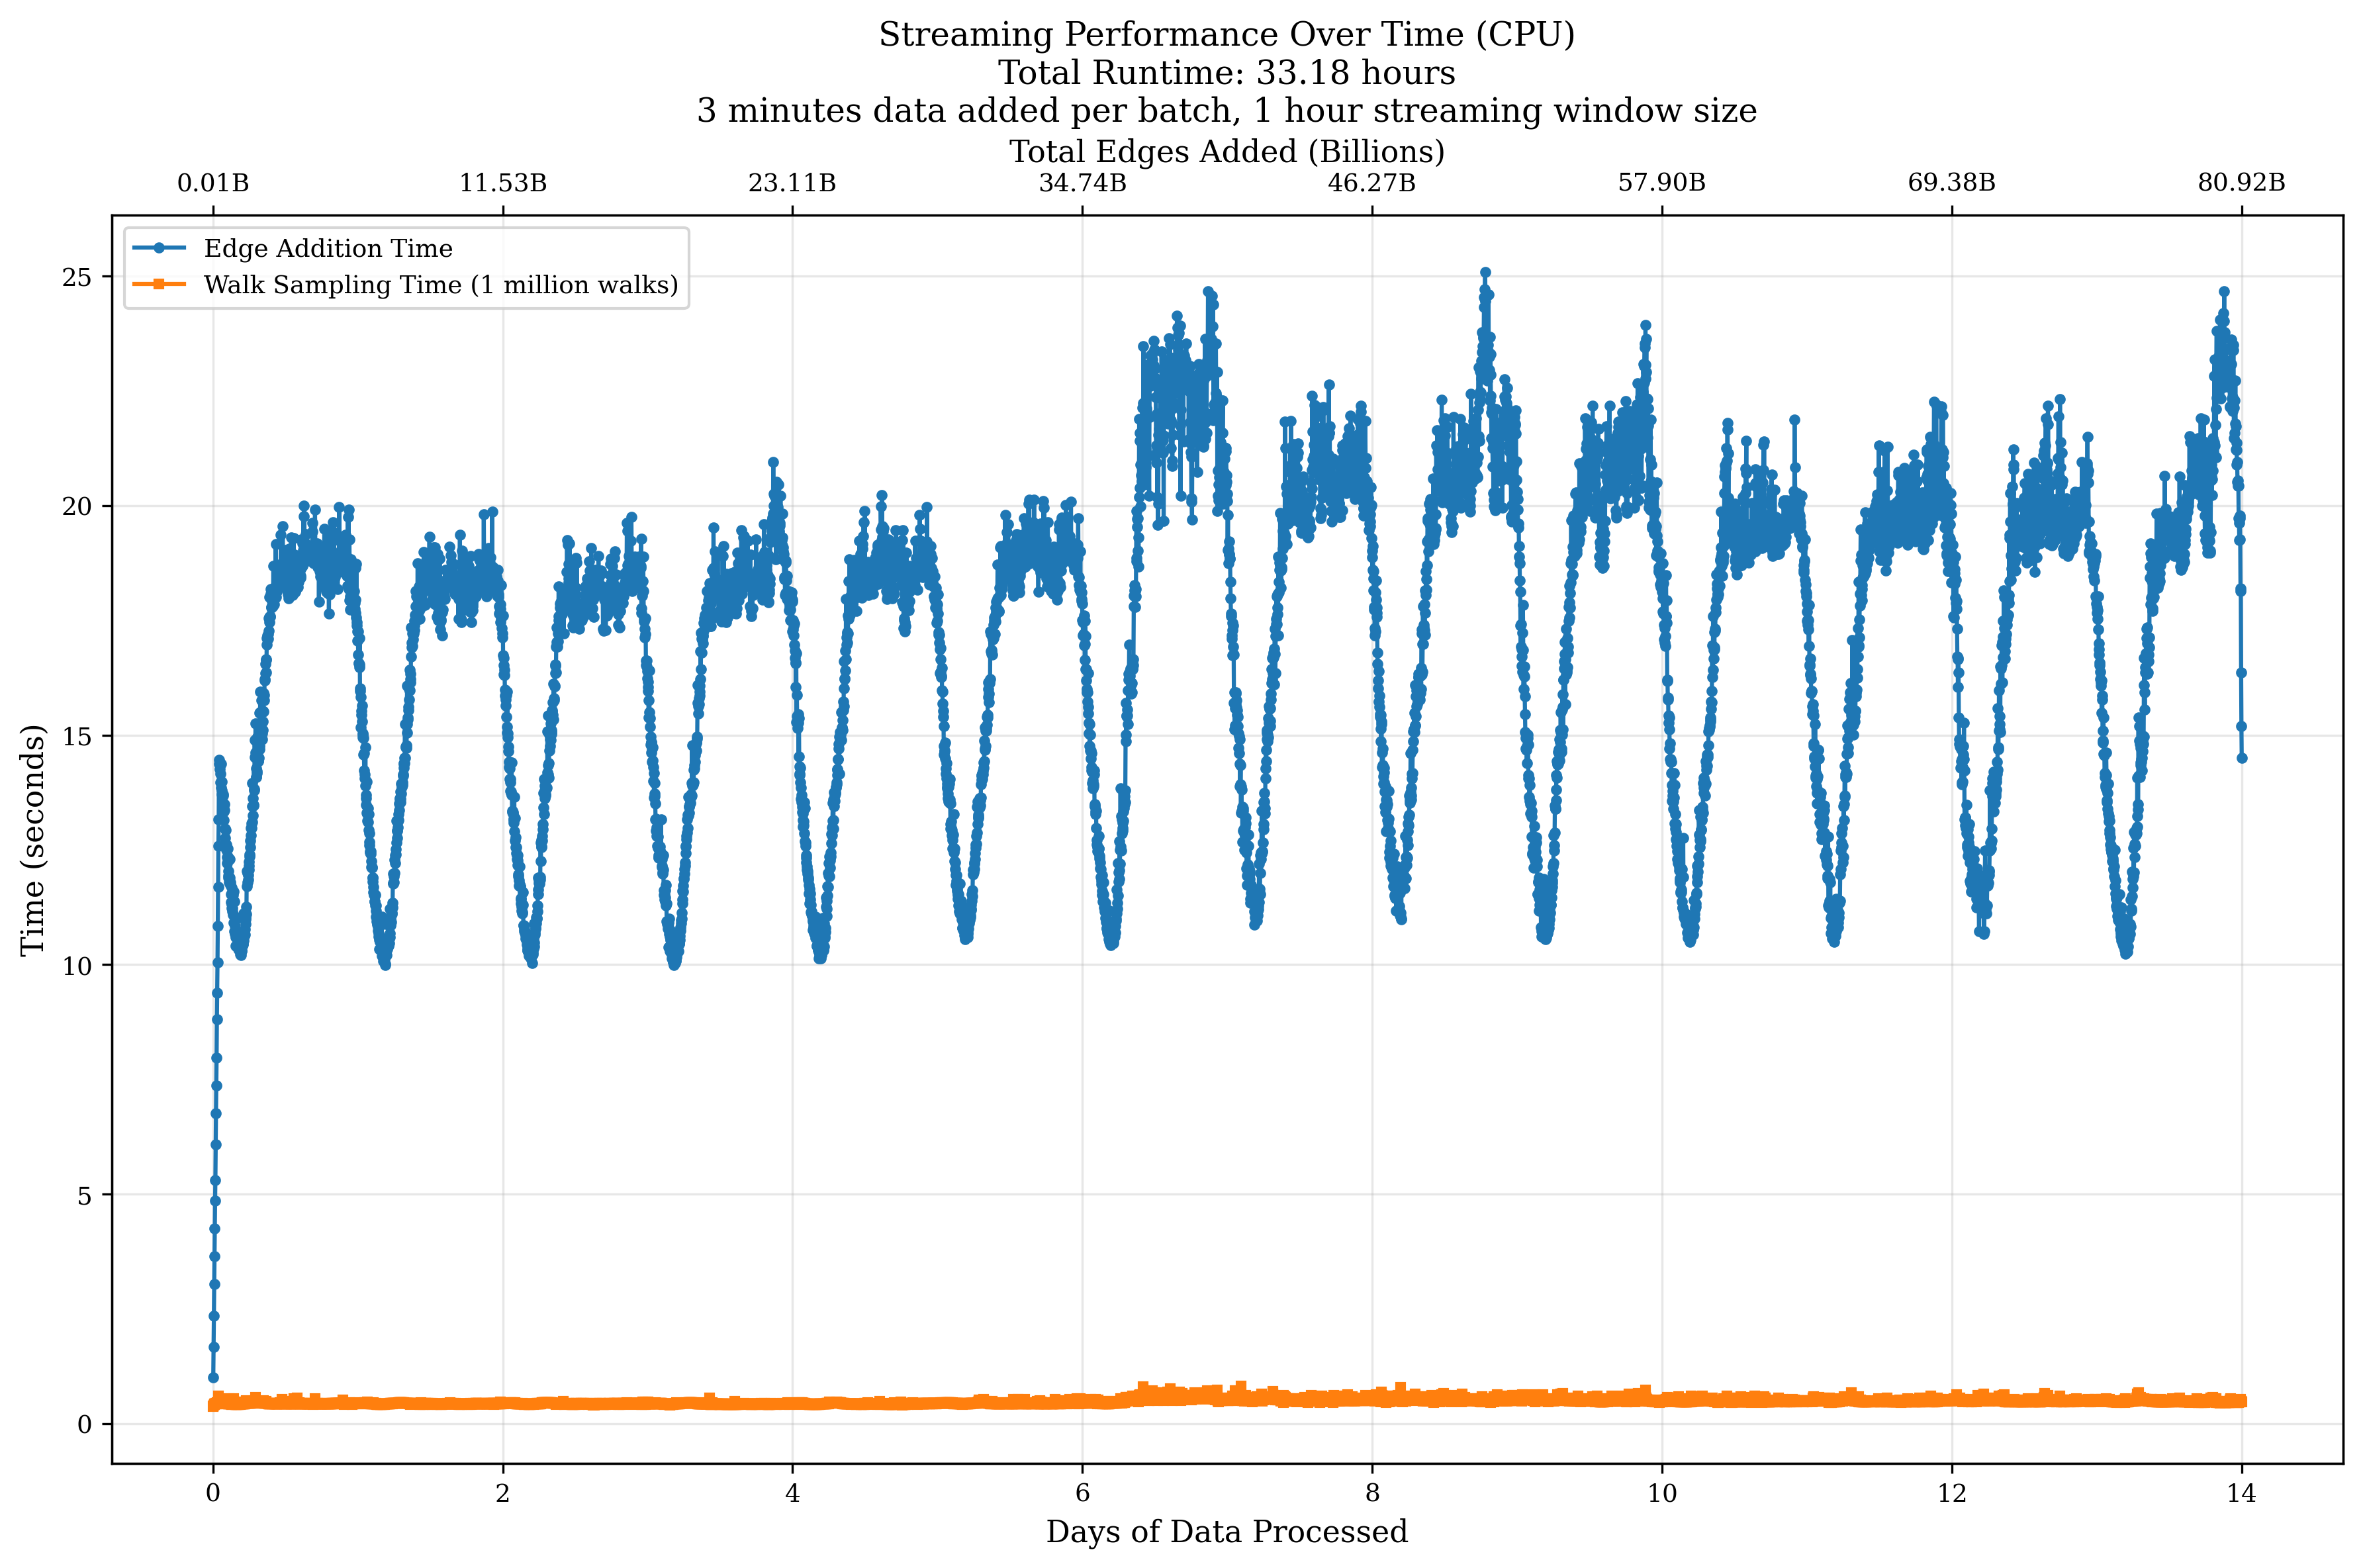

In [23]:
# Primary data
edge_addition_time = alibaba_data_cpu['edge_addition_time']
walk_sampling_time = alibaba_data_cpu['walk_sampling_time']
total_edges = alibaba_data_cpu['total_edges']

# Compute total runtime in hours
total_time = np.sum(edge_addition_time) + np.sum(walk_sampling_time)
total_time_hours = total_time / 3600  # convert seconds to hours

# X-axis labels
minutes_per_step = 3
steps = list(range(1, len(edge_addition_time) + 1))
step_labels_minutes = [s * minutes_per_step for s in steps]
step_labels_days = [m / 1440 for m in step_labels_minutes]  # 1440 mins/day

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot edge and walk times over days
ax1.plot(step_labels_days, edge_addition_time, label='Edge Addition Time', marker='o', markersize=3, linestyle='-')
ax1.plot(step_labels_days, walk_sampling_time, label='Walk Sampling Time (1 million walks)', marker='s', markersize=3, linestyle='-')

ax1.set_xlabel("Days of Data Processed")
ax1.set_ylabel("Time (seconds)")
ax1.set_title(f"Streaming Performance Over Time (CPU)\nTotal Runtime: {total_time_hours:.2f} hours\n3 minutes data added per batch, 1 hour streaming window size")
ax1.grid(True, alpha=0.3)
ax1.legend()

# --- Secondary X-axis: Total edges added in billions ---
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))
ax2.set_xlabel("Total Edges Added (Billions)")

plt.tight_layout()
plt.savefig("plots/alibaba_cpu.png")
plt.show()

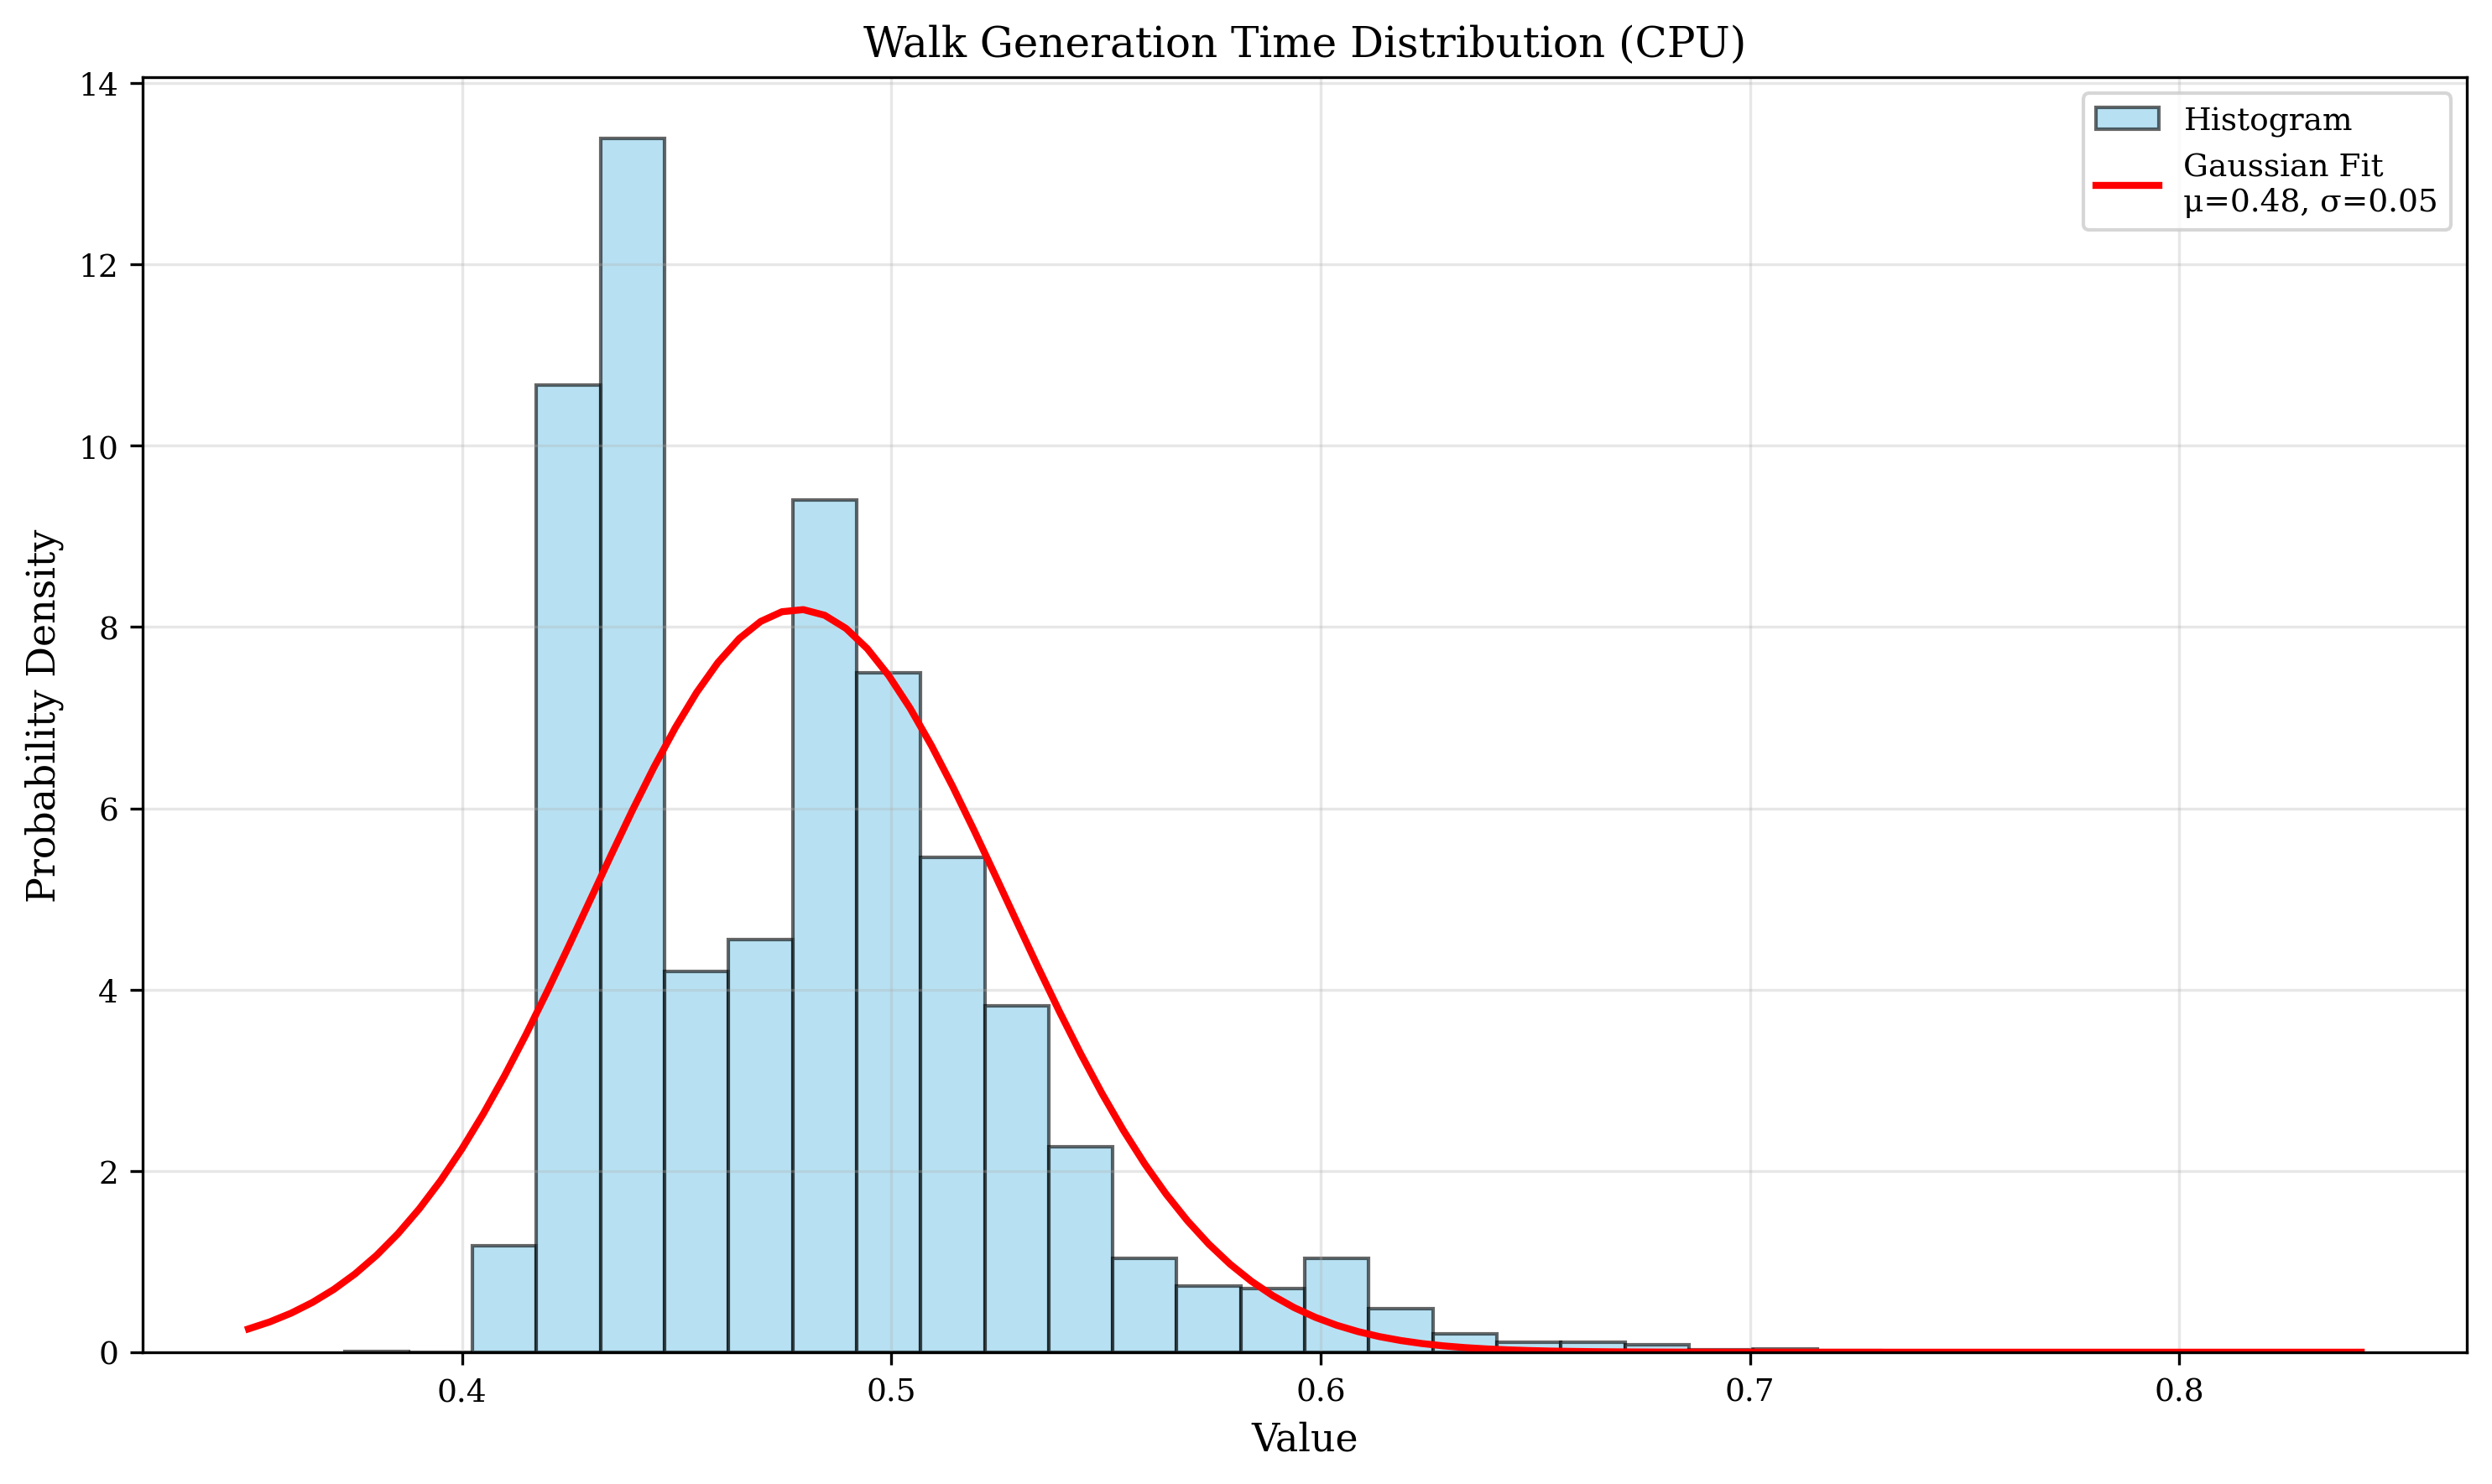

In [24]:
mu, std = norm.fit(alibaba_data_cpu['walk_sampling_time'])

# Plot histogram of the data
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(alibaba_data_cpu['walk_sampling_time'], bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label=f'Gaussian Fit\nμ={mu:.2f}, σ={std:.2f}')

plt.title('Walk Generation Time Distribution (CPU)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('plots/cpu_walk_time_distribution.png')
plt.show()

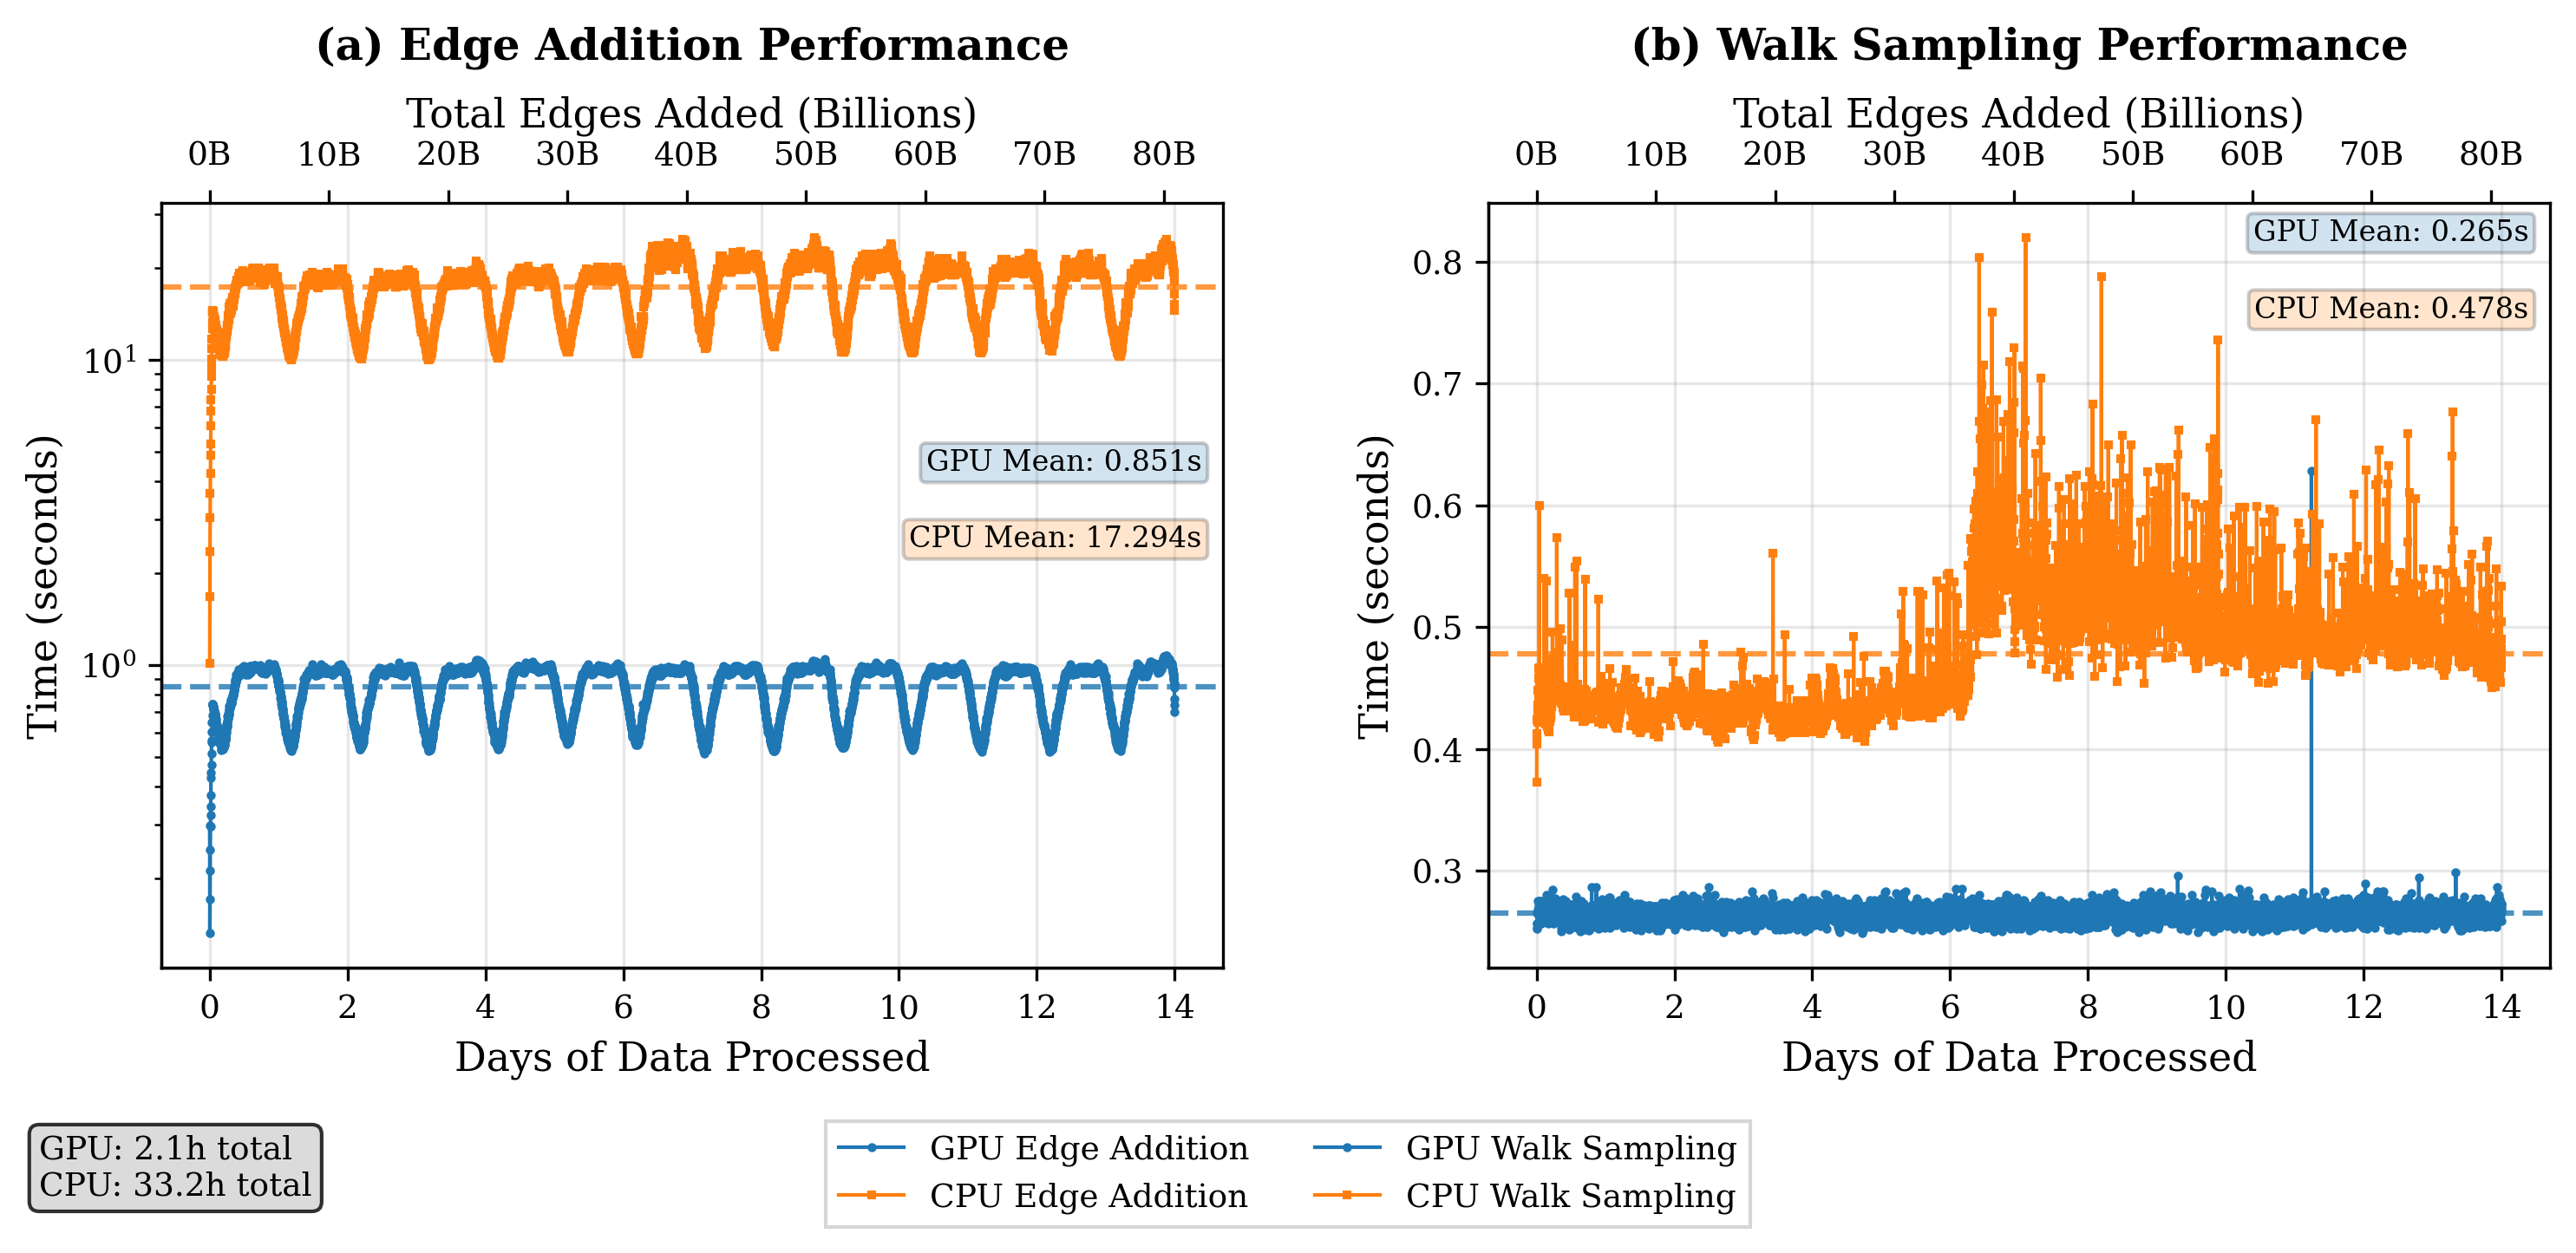

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Configure fonts and style for academic paper
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Primary data
edge_addition_time_cpu = alibaba_data_cpu['edge_addition_time']
walk_sampling_time_cpu = alibaba_data_cpu['walk_sampling_time']
total_edges_cpu = alibaba_data_cpu['total_edges']

edge_addition_time_gpu = alibaba_data_gpu['edge_addition_time']
walk_sampling_time_gpu = alibaba_data_gpu['walk_sampling_time']
total_edges_gpu = alibaba_data_gpu['total_edges']

# Compute total runtime in hours
total_time_cpu = np.sum(edge_addition_time_cpu) + np.sum(walk_sampling_time_cpu)
total_time_hours_cpu = total_time_cpu / 3600

total_time_gpu = np.sum(edge_addition_time_gpu) + np.sum(walk_sampling_time_gpu)
total_time_hours_gpu = total_time_gpu / 3600

# Calculate mean times
mean_edge_time_cpu = np.mean(edge_addition_time_cpu)
mean_edge_time_gpu = np.mean(edge_addition_time_gpu)
mean_walk_time_cpu = np.mean(walk_sampling_time_cpu)
mean_walk_time_gpu = np.mean(walk_sampling_time_gpu)

# X-axis labels
minutes_per_step = 3
steps_cpu = list(range(1, len(edge_addition_time_cpu) + 1))
step_labels_minutes_cpu = [s * minutes_per_step for s in steps_cpu]
step_labels_days_cpu = [m / 1440 for m in step_labels_minutes_cpu]

steps_gpu = list(range(1, len(edge_addition_time_gpu) + 1))
step_labels_minutes_gpu = [s * minutes_per_step for s in steps_gpu]
step_labels_days_gpu = [m / 1440 for m in step_labels_minutes_gpu]

# Academic color scheme
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c']  # Blue, Orange, Red, Green

# Create 1x2 subplot
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 4))

# --- Left plot: Edge Addition Times ---
line1 = ax1.plot(step_labels_days_gpu, edge_addition_time_gpu,
                 label='GPU Edge Addition', marker='o', markersize=1.5,
                 linestyle='-', color=colors[0], linewidth=1)[0]
line2 = ax1.plot(step_labels_days_cpu, edge_addition_time_cpu,
                 label='CPU Edge Addition', marker='s', markersize=1.5,
                 linestyle='-', color=colors[1], linewidth=1)[0]

line3 = ax1.axhline(y=mean_edge_time_gpu, color=colors[0], linestyle='--',
                    alpha=0.8, linewidth=1.5,
                    label=f'GPU Mean: {mean_edge_time_gpu:.3f}s')
line4 = ax1.axhline(y=mean_edge_time_cpu, color=colors[1], linestyle='--',
                    alpha=0.8, linewidth=1.5,
                    label=f'CPU Mean: {mean_edge_time_cpu:.3f}s')

# Add text annotations for edge addition means
ax1.text(0.98, 0.65, f'GPU Mean: {mean_edge_time_gpu:.3f}s',
         transform=ax1.transAxes, fontsize=8, ha='right',
         bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[0], alpha=0.2))
ax1.text(0.98, 0.55, f'CPU Mean: {mean_edge_time_cpu:.3f}s',
         transform=ax1.transAxes, fontsize=8, ha='right',
         bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[1], alpha=0.2))

ax1.set_xlabel("Days of Data Processed")
ax1.set_ylabel("Time (seconds)")
ax1.set_title("(a) Edge Addition Performance", fontweight='bold', pad=10)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Secondary X-axis for edge addition with custom ticks
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

# Use GPU data for secondary axis (longer dataset)
max_days_gpu = max(step_labels_days_gpu)
max_edges_gpu = max(total_edges_gpu) / 1e9  # Convert to billions

# Create ticks every 10 billion up to 80B
tick_edges_billions = [0, 10, 20, 30, 40, 50, 60, 70, 80]
tick_days = [(edge_bil / max_edges_gpu) * max_days_gpu for edge_bil in tick_edges_billions]

ax2.set_xticks(tick_days)
ax2.set_xticklabels([f'{int(e)}B' for e in tick_edges_billions])
ax2.set_xlabel("Total Edges Added (Billions)", fontsize=11)
ax2.tick_params(axis='x', labelsize=9, pad=5)

# --- Right plot: Walk Sampling Times ---
line5 = ax3.plot(step_labels_days_gpu, walk_sampling_time_gpu,
                 label='GPU Walk Sampling', marker='o', markersize=1.5,
                 linestyle='-', color=colors[0], linewidth=1)[0]
line6 = ax3.plot(step_labels_days_cpu, walk_sampling_time_cpu,
                 label='CPU Walk Sampling', marker='s', markersize=1.5,
                 linestyle='-', color=colors[1], linewidth=1)[0]

line7 = ax3.axhline(y=mean_walk_time_gpu, color=colors[0], linestyle='--',
                    alpha=0.8, linewidth=1.5,
                    label=f'GPU Mean: {mean_walk_time_gpu:.3f}s')
line8 = ax3.axhline(y=mean_walk_time_cpu, color=colors[1], linestyle='--',
                    alpha=0.8, linewidth=1.5,
                    label=f'CPU Mean: {mean_walk_time_cpu:.3f}s')

# Add text annotations for walk sampling means
ax3.text(0.98, 0.95, f'GPU Mean: {mean_walk_time_gpu:.3f}s',
         transform=ax3.transAxes, fontsize=8, ha='right',
         bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[0], alpha=0.2))
ax3.text(0.98, 0.85, f'CPU Mean: {mean_walk_time_cpu:.3f}s',
         transform=ax3.transAxes, fontsize=8, ha='right',
         bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[1], alpha=0.2))

ax3.set_xlabel("Days of Data Processed")
ax3.set_ylabel("Time (seconds)")
ax3.set_title("(b) Walk Sampling Performance", fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Secondary X-axis for walk sampling with custom ticks
ax4 = ax3.twiny()
ax4.set_xlim(ax3.get_xlim())
ax4.set_xticks(tick_days)
ax4.set_xticklabels([f'{int(e)}B' for e in tick_edges_billions])
ax4.set_xlabel("Total Edges Added (Billions)", fontsize=11)
ax4.tick_params(axis='x', labelsize=9, pad=5)

# Add performance summary
summary_text = f"GPU: {total_time_hours_gpu:.1f}h total\nCPU: {total_time_hours_cpu:.1f}h total"
fig.text(0.02, -0.08, summary_text, transform=fig.transFigure,
         fontsize=9, verticalalignment='bottom',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.8))

# Add single legend at bottom
handles = [line1, line2, line5, line6]
labels = ['GPU Edge Addition', 'CPU Edge Addition', 'GPU Walk Sampling', 'CPU Walk Sampling']
fig.legend(handles, labels,
          loc='lower center',
          bbox_to_anchor=(0.5, -0.12),
          ncol=2,
          frameon=True,
          fancybox=False,
          fontsize=9)

# Adjust layout with proper spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.25, top=0.88)

# Save with high quality
plt.savefig("plots/alibaba_gpu_vs_cpu_streaming.pdf", format='pdf', bbox_inches='tight')
plt.savefig("plots/alibaba_gpu_vs_cpu_streaming.png", format='png', bbox_inches='tight')
plt.show()

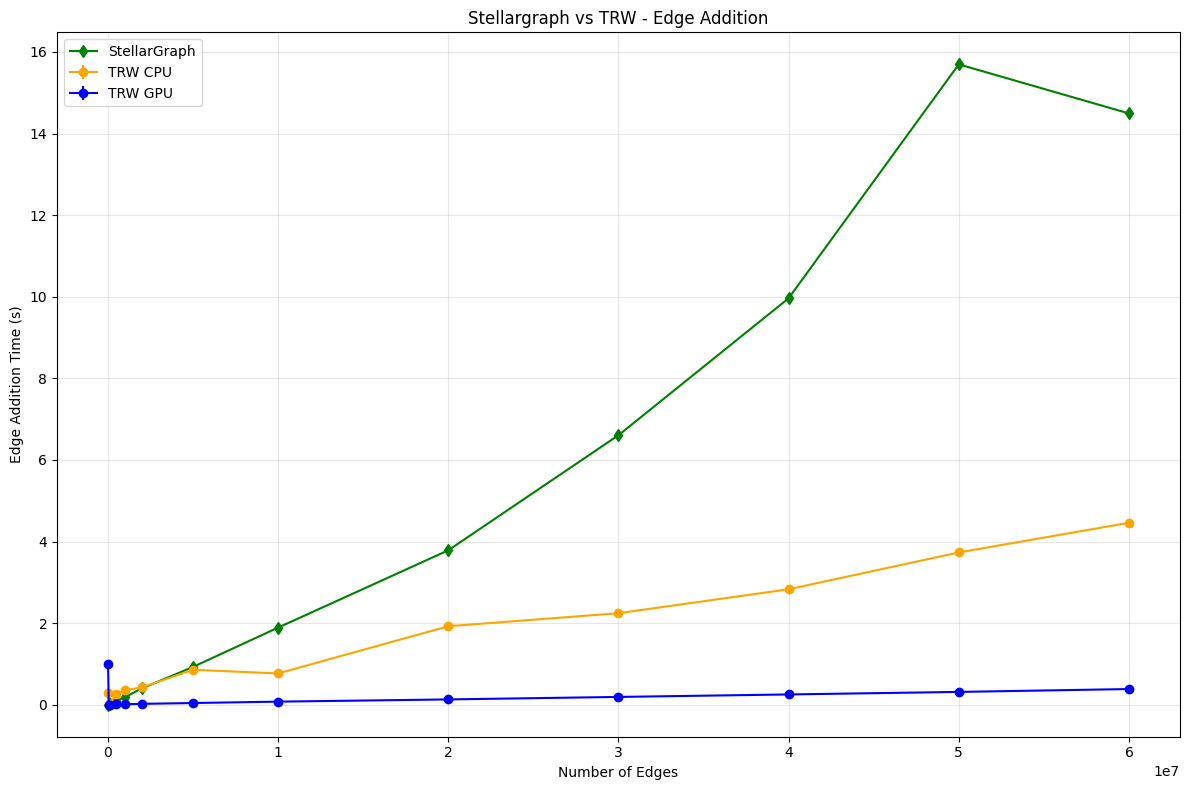

In [19]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

# Load results
with open("results/stellargraph_results.pkl", "rb") as f:
    results = pickle.load(f)

def compute_mean_std(data):
    data = np.array(data)
    return data.mean(axis=1), data.std(axis=1)

# Edge counts for edge addition
edge_counts = [
    10_000, 50_000, 100_000, 500_000, 1_000_000, 2_000_000,
    5_000_000, 10_000_000, 20_000_000, 30_000_000, 40_000_000,
    50_000_000, 60_000_000
]

plt.figure(figsize=(12, 8))

# TRW CPU (Index-Based only = no weights)
cpu_index, cpu_index_std = compute_mean_std(results['edge_addition_trw_cpu']['edge_addition_time_without_weights'])

# TRW GPU (Index-Based only = no weights)
gpu_index, gpu_index_std = compute_mean_std(results['edge_addition_trw_gpu']['edge_addition_time_without_weights'])

# StellarGraph
stellargraph_mean, _ = compute_mean_std(results['edge_addition_stellargraph'])

plt.errorbar(edge_counts, cpu_index, yerr=cpu_index_std, label="TRW CPU", fmt='o-', color='orange')
plt.errorbar(edge_counts, gpu_index, yerr=gpu_index_std, label="TRW GPU", fmt='o-', color='blue')
plt.plot(edge_counts, stellargraph_mean, label="StellarGraph", marker='d', linestyle='-', color='green')

plt.xlabel("Number of Edges")
plt.ylabel("Edge Addition Time (s)")
plt.title("Stellargraph vs TRW - Edge Addition")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/plot_edge_addition_times_stellargraph_vs_trw.png")
plt.show()

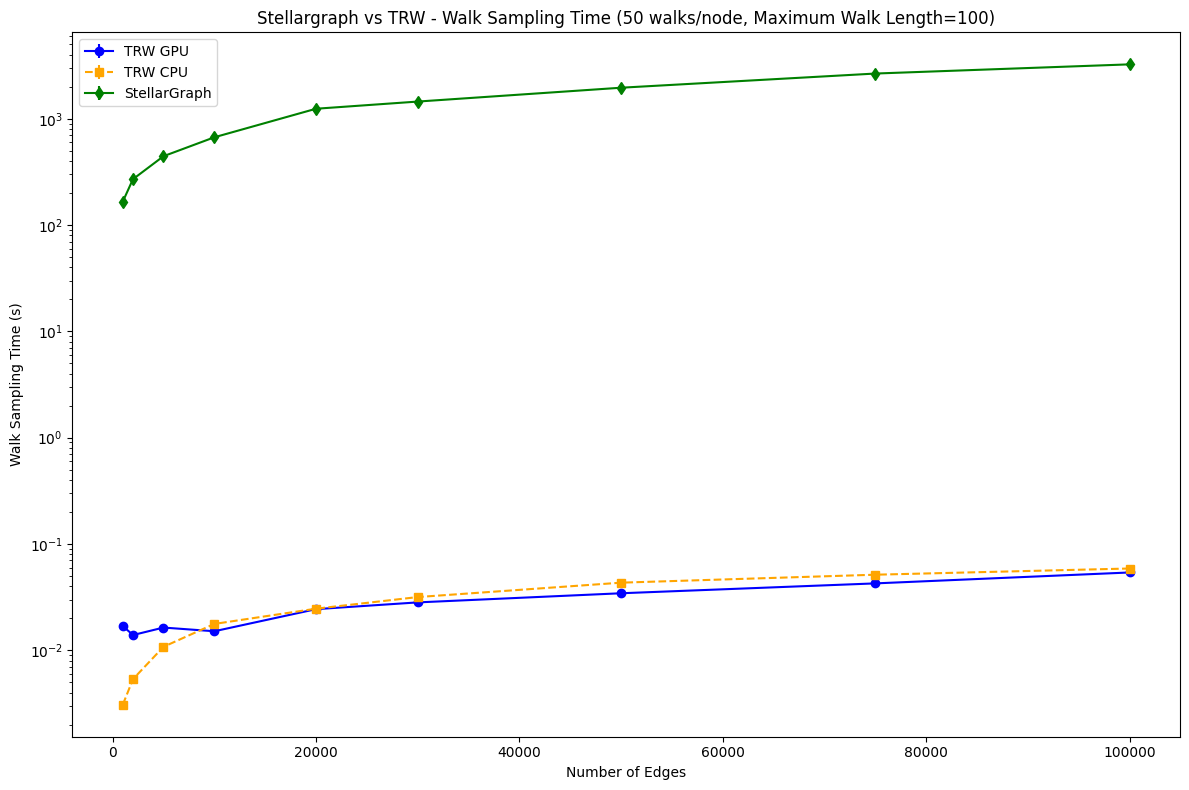

In [20]:
# Edge sizes used in walk sampling
edge_sizes = [1_000, 2_000, 5_000, 10_000, 20_000, 30_000, 50_000, 75_000, 100_000]

# TRW GPU (Index-Based)
gpu_walk_index, gpu_walk_index_std = compute_mean_std(
    results['walk_sampling_vs_edge_size_trw_gpu']['walk_sampling_time_index_based']
)

# TRW CPU (Index-Based)
cpu_walk_index, cpu_walk_index_std = compute_mean_std(
    results['walk_sampling_vs_edge_size_trw_cpu']['walk_sampling_time_index_based']
)

# StellarGraph
stellar_walk, stellar_walk_std = compute_mean_std(
    results['walk_sampling_vs_edge_size_stellargraph']['walk_sampling_time']
)

# Plotting
plt.figure(figsize=(12, 8))
plt.errorbar(edge_sizes, gpu_walk_index, yerr=gpu_walk_index_std, label="TRW GPU", fmt='o-', color='blue')
plt.errorbar(edge_sizes, cpu_walk_index, yerr=cpu_walk_index_std, label="TRW CPU", fmt='s--', color='orange')
plt.errorbar(edge_sizes, stellar_walk, yerr=stellar_walk_std, label="StellarGraph", fmt='d-', color='green')

plt.xlabel("Number of Edges")
plt.ylabel("Walk Sampling Time (s)")
plt.yscale('log')
plt.title("Stellargraph vs TRW - Walk Sampling Time (50 walks/node, Maximum Walk Length=100)")
plt.legend()
plt.tight_layout()
plt.savefig("plots/plot_walk_sampling_times_stellargraph_vs_trw.png")
plt.show()

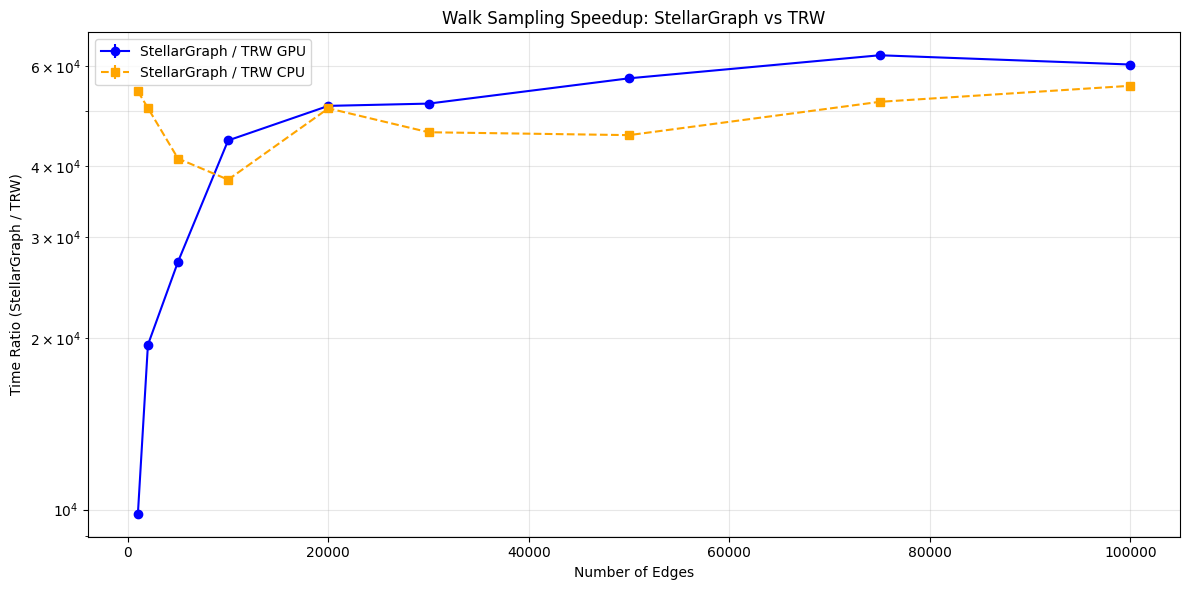

In [21]:
# Calculate mean and std again to ensure alignment
stellar_mean, stellar_std = compute_mean_std(results['walk_sampling_vs_edge_size_stellargraph']['walk_sampling_time'])
gpu_mean, gpu_std = compute_mean_std(results['walk_sampling_vs_edge_size_trw_gpu']['walk_sampling_time_index_based'])
cpu_mean, cpu_std = compute_mean_std(results['walk_sampling_vs_edge_size_trw_cpu']['walk_sampling_time_index_based'])

# Compute speedup ratios and propagated std (error propagation for division)
ratio_gpu = stellar_mean / gpu_mean
ratio_gpu_std = ratio_gpu * np.sqrt((stellar_std / stellar_mean) ** 2 + (gpu_std / gpu_mean) ** 2)

ratio_cpu = stellar_mean / cpu_mean
ratio_cpu_std = ratio_cpu * np.sqrt((stellar_std / stellar_mean) ** 2 + (cpu_std / cpu_mean) ** 2)

# Plotting
plt.figure(figsize=(12, 6))
plt.errorbar(edge_sizes, ratio_gpu, yerr=ratio_gpu_std, fmt='o-', color='blue', label='StellarGraph / TRW GPU')
plt.errorbar(edge_sizes, ratio_cpu, yerr=ratio_cpu_std, fmt='s--', color='orange', label='StellarGraph / TRW CPU')

plt.xlabel("Number of Edges")
plt.ylabel("Time Ratio (StellarGraph / TRW)")
plt.yscale('log')  # Log scale to show multiplicative gain
plt.title("Walk Sampling Speedup: StellarGraph vs TRW")
plt.grid(True, alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.savefig("plots/plot_walk_sampling_ratios_stellargraph_vs_trw.png")
plt.show()

In [9]:
import pickle

with open('results/tgbl_coin_noisy_test_1_10_wv.pickle', 'rb') as f:
    noise_test_results = pickle.load(f)

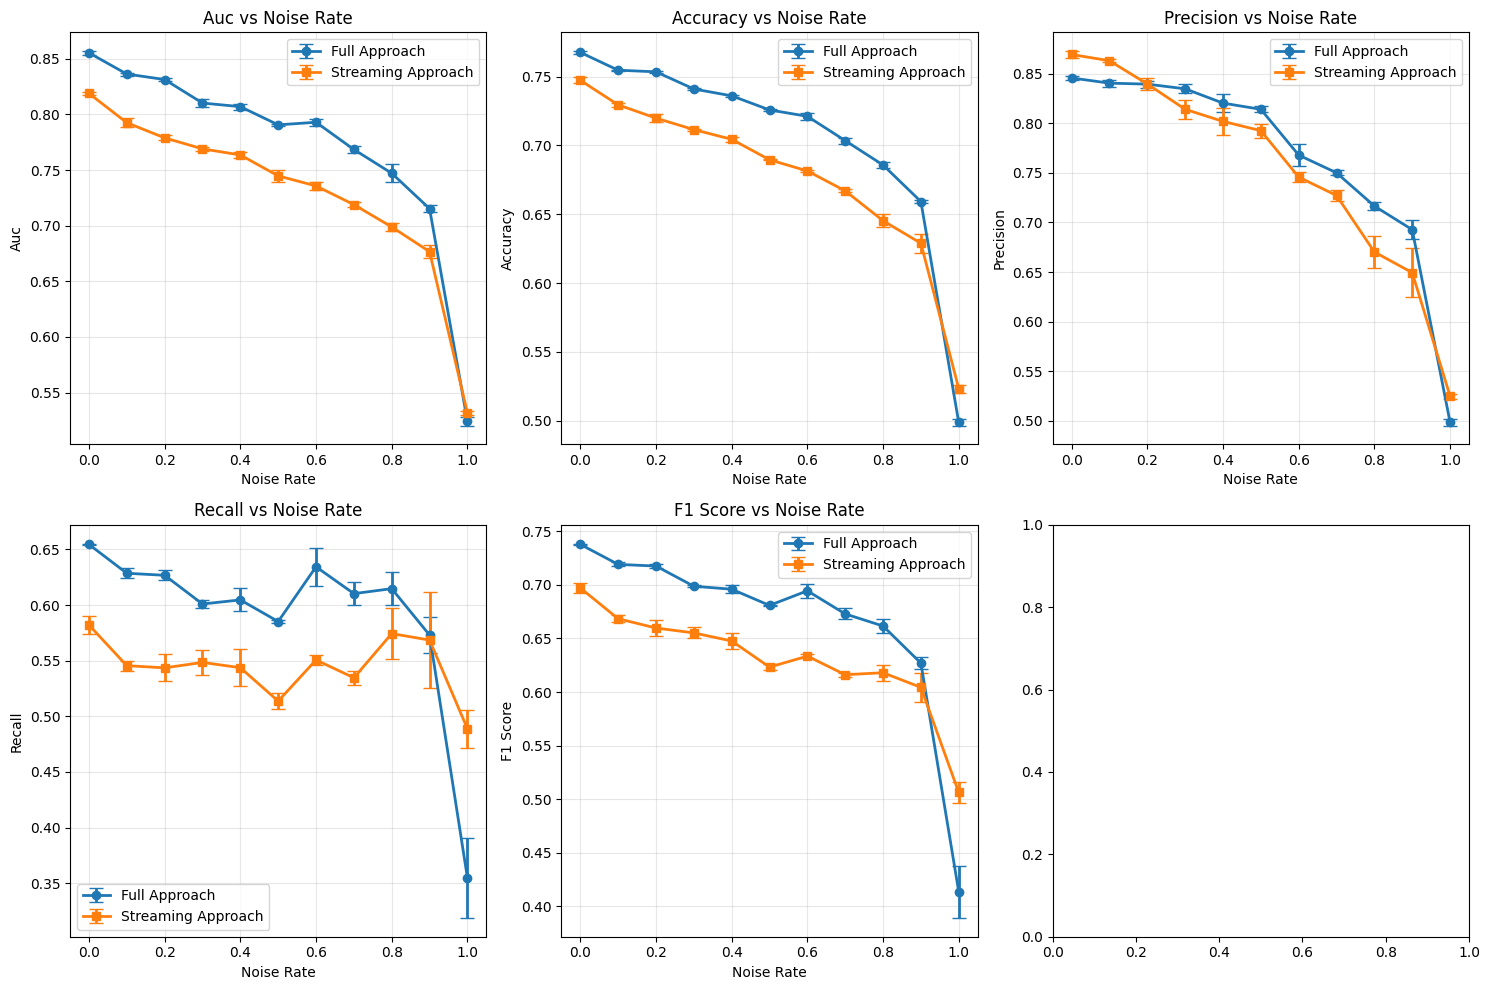

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
noise_rates = sorted(noise_test_results['full_approach'].keys())
metrics = ['auc', 'accuracy', 'precision', 'recall', 'f1_score']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]

    # Extract values for full approach
    full_means = []
    full_stds = []

    # Extract values for streaming approach
    streaming_means = []
    streaming_stds = []

    for noise_rate in noise_rates:
        # Full approach
        full_values = noise_test_results['full_approach'][noise_rate][metric]
        full_means.append(np.mean(full_values))
        full_stds.append(np.std(full_values))

        # Streaming approach
        streaming_values = noise_test_results['streaming_approach'][noise_rate][metric]
        streaming_means.append(np.mean(streaming_values))
        streaming_stds.append(np.std(streaming_values))

    # Plot with error bars
    ax.errorbar(noise_rates, full_means, yerr=full_stds,
                label='Full Approach', marker='o', capsize=5, linewidth=2)
    ax.errorbar(noise_rates, streaming_means, yerr=streaming_stds,
                label='Streaming Approach', marker='s', capsize=5, linewidth=2)

    ax.set_xlabel('Noise Rate')
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.set_title(f'{metric.replace("_", " ").title()} vs Noise Rate')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.05, 1.05)

plt.tight_layout()

plt.savefig('plots/plots_full_vs_streaming.png')
plt.show()

In [11]:
# Generate summary statistics table
print("\n" + "="*60)
print("PERFORMANCE GAP ANALYSIS: FULL vs STREAMING APPROACHES")
print("="*60)

overall_gaps = []

for metric in metrics:
    print(f"\n{metric.upper().replace('_', ' ')}:")
    print("-" * 40)

    gaps = []
    full_performances = []

    for noise_rate in noise_rates:
        full_mean = np.mean(noise_test_results['full_approach'][noise_rate][metric])
        streaming_mean = np.mean(noise_test_results['streaming_approach'][noise_rate][metric])
        gap = full_mean - streaming_mean
        gaps.append(gap)
        full_performances.append(full_mean)

    # Calculate statistics
    mean_gap = np.mean(gaps)
    std_gap = np.std(gaps)
    max_gap = np.max(gaps)
    min_gap = np.min(gaps)
    max_gap_noise = noise_rates[np.argmax(gaps)]
    min_gap_noise = noise_rates[np.argmin(gaps)]

    # Relative performance (as percentage of average full performance)
    avg_full_performance = np.mean(full_performances)
    relative_gap = (mean_gap / avg_full_performance) * 100

    print(f"  Mean gap: {mean_gap:.4f} ± {std_gap:.4f}")
    print(f"  Max gap: {max_gap:.4f} (at noise rate {max_gap_noise:.2f})")
    print(f"  Min gap: {min_gap:.4f} (at noise rate {min_gap_noise:.2f})")
    print(f"  Relative gap: {relative_gap:.2f}% of full approach performance")

    # Check if gap is consistently small
    if max_gap < 0.05:  # Less than 5% absolute difference
        print(f"  ✓ Consistently small gap (max < 0.05)")

    overall_gaps.extend(gaps)

# Overall summary
print(f"\n{'='*60}")
print("OVERALL SUMMARY:")
print(f"{'='*60}")
overall_mean_gap = np.mean(overall_gaps)
overall_std_gap = np.std(overall_gaps)
print(f"Average gap across all metrics and noise levels: {overall_mean_gap:.4f} ± {overall_std_gap:.4f}")

# Calculate percentage of cases where streaming is within X% of full
close_cases_1pct = sum(1 for gap in overall_gaps if gap < 0.01) / len(overall_gaps) * 100
close_cases_3pct = sum(1 for gap in overall_gaps if gap < 0.03) / len(overall_gaps) * 100
close_cases_5pct = sum(1 for gap in overall_gaps if gap < 0.05) / len(overall_gaps) * 100

print(f"\nPercentage of cases where streaming is within:")
print(f"  1% of full performance: {close_cases_1pct:.1f}%")
print(f"  3% of full performance: {close_cases_3pct:.1f}%")
print(f"  5% of full performance: {close_cases_5pct:.1f}%")

print(f"\n{'='*60}")


PERFORMANCE GAP ANALYSIS: FULL vs STREAMING APPROACHES

AUC:
----------------------------------------
  Mean gap: 0.0408 ± 0.0163
  Max gap: 0.0572 (at noise rate 0.60)
  Min gap: -0.0075 (at noise rate 1.00)
  Relative gap: 5.30% of full approach performance

ACCURACY:
----------------------------------------
  Mean gap: 0.0271 ± 0.0173
  Max gap: 0.0405 (at noise rate 0.80)
  Min gap: -0.0246 (at noise rate 1.00)
  Relative gap: 3.85% of full approach performance
  ✓ Consistently small gap (max < 0.05)

PRECISION:
----------------------------------------
  Mean gap: 0.0111 ± 0.0246
  Max gap: 0.0463 (at noise rate 0.80)
  Min gap: -0.0264 (at noise rate 1.00)
  Relative gap: 1.45% of full approach performance
  ✓ Consistently small gap (max < 0.05)

RECALL:
----------------------------------------
  Mean gap: 0.0449 ± 0.0609
  Max gap: 0.0837 (at noise rate 0.60)
  Min gap: -0.1340 (at noise rate 1.00)
  Relative gap: 7.61% of full approach performance

F1 SCORE:
-------------------